# Basics of Noise

Siju K S (Research Scholar, Center for Computational Engineering & Networking, Amrita Vishwa Vidyapeetham)

# Basics of Denoising Algorithms

Noise is an unwanted random variation that interferes with the underlying signal in an image or data. In the context of image processing and denoising algorithms, noise introduces distortions that degrade the visual quality of an image, making it challenging to interpret or analyse the data accurately. Noise can arise from various sources during image acquisition, transmission, or processing. Understanding the types of noise and their mathematical representations is essential for designing effective denoising algorithms.

## Types of Noise

### 1. Additive Noise

Additive noise refers to noise that is simply added to the original signal. This type of noise is mathematically expressed as:

$$
y(i, j) = x(i, j) + n(i, j)
$$

Where: - $y(i, j)$ is the noisy image, - $x(i, j)$ is the true, noise-free image, and - $n(i, j)$ is the noise at pixel ((i, j)).

#### Gaussian Noise

Gaussian noise is the most common type of additive noise. The noise at each pixel follows a Gaussian distribution with mean $\mu$ and variance $\sigma^2$:

$$
n(i, j) \sim \mathcal{N}(\mu, \sigma^2)
$$

In most cases, Gaussian noise is assumed to have zero mean ($\mu = 0$), making the noise purely random but distributed symmetrically around zero.

### 2. Multiplicative Noise

Multiplicative noise, as the name suggests, multiplies the signal rather than adding to it. This type of noise is often encountered in systems like radar and ultrasound imaging. It can be represented mathematically as:

$$
y(i, j) = x(i, j) \cdot n(i, j)
$$

#### Speckle Noise

A specific example of multiplicative noise is **speckle noise**, which typically arises in coherent imaging systems like laser and ultrasound. It is often modelled as:

$$
n(i, j) \sim \mathcal{U}(1, \sigma)
$$

Where $\mathcal{U}(1, \sigma)$ is a uniform distribution.

### 3. Salt-and-Pepper Noise (Impulse Noise)

Salt-and-pepper noise is a type of impulse noise where pixels are randomly corrupted with extreme values (either 0 or 255 in an 8-bit grayscale image). This noise is represented as:

$$
y(i, j) =
\begin{cases}
0, & \text{with probability } p_1 \\
255, & \text{with probability } p_2 \\
x(i, j), & \text{otherwise}
\end{cases}
$$

The pixels take on either the minimum or maximum values, making this noise appear as white and black specks in an image.

### 4. Poisson Noise (Shot Noise)

Poisson noise arises due to the discrete nature of photon counting in imaging systems. It is signal-dependent, meaning the amount of noise depends on the intensity of the signal. This is expressed using the Poisson distribution:

$$
y(i, j) \sim \text{Poisson}(\lambda x(i, j))
$$

Here, $\lambda$ is a scaling factor, and the noise follows a Poisson distribution based on the true intensity value $x(i, j)$.

### 5. Quantization Noise

Quantization noise occurs during the digitization process, where continuous signal values are rounded off to discrete levels. This is typically modelled as additive noise with a uniform distribution:

$$
n(i, j) \sim \mathcal{U}(-\Delta/2, \Delta/2)
$$

Where $\Delta$ is the step size of the quantization process.

## Connection to Denoising Algorithms

Denoising algorithms are designed to estimate the clean signal $x(i,j)$ from the noisy observations $y(i,j)$. The type and characteristics of the noise play a crucial role in selecting appropriate denoising methods. Some commonly used denoising methods include:

-   **Gaussian Smoothing**: Ideal for Gaussian noise removal,
-   **Median Filtering**: Effective against salt-and-pepper noise,
-   **Non-Local Means (NLM)** and **BM3D**: Advanced methods for a wide range of noise types.

## Introduction to Basic Denoising Algorithms

Denoising algorithms are essential in image processing to remove various types of noise that distort image quality. Each type of noise (Gaussian, salt-and-pepper, multiplicative, Poisson, etc.) demands different approaches. This section develops a conceptual foundation for understanding the core denoising algorithms used to tackle these noises. We explore their mathematical models, functioning, and the rationale behind each method.

## Denoising Algorithms for Additive Noise

Several methods exist to remove or reduce additive noise in images. Below are the most common techniques:

### 1. Gaussian Smoothing (Low-pass Filtering)

Gaussian smoothing is a linear filter that reduces noise by averaging the pixels in the neighbourhood, weighted by a Gaussian function. The denoised image can be computed as:

$$ \hat{x}(i, j) = \sum_{k,l} G(k, l) y(i-k, j-l) $$

where $$G(k, l)$$ is the Gaussian kernel.

### 2. Median Filtering

Median filtering is a non-linear method where the value of each pixel is replaced by the median value of the neighbouring pixels. This is particularly effective for noise like salt-and-pepper noise, but it can also handle Gaussian noise:

$$ \hat{x}(i, j) = \text{median} \{ y(i+k, j+l) \} $$

### 3. Wiener Filtering

Wiener filtering is designed for images affected by additive Gaussian noise and uses local statistical information to perform denoising:

$$ \hat{x}(i, j) = \frac{H^*(u,v) S_{xx}(u,v)}{|H(u,v)|^2 S_{xx}(u,v) + S_{nn}(u,v)} $$

where: - $$H(u, v)$$ is the degradation function, - $$S_{xx}(u,v)$$ and $$S_{nn}(u,v)$$ are the power spectra of the original signal and noise, respectively.

The Wiener filter is derived under the assumption that the signal $x$ and noise $n$ are uncorrelated, and both are stationary stochastic processes. Given this, the Wiener filter is designed to minimize the MSE between the true signal and the estimate by accounting for the signal’s and noise’s power spectral densities (PSDs).

The Wiener filter minimizes the MSE by balancing the contribution of the noisy data and the signal’s inherent structure. It effectively applies more filtering where the noise dominates (i.e., where $S_{nn}(\omega)$ is large) and less filtering where the signal is stronger (i.e., where $S_{xx}(\omega)$ is large).

> **Intuition**
>
> In simple terms, the Wiener filter achieves the optimal balance between noise suppression and signal preservation by minimizing the MSE. It effectively chooses a trade-off between removing as much noise as possible while still preserving the signal’s details. This is why the Wiener filter can be said to minimize the cost function,
>
> $$\Phi_\lambda(y)=\mathbb{E}\left(||y-x||^2\right)$$
>
> By solving this minimization problem using calculus of variations, we arrive at the Wiener filter formula,
>
> $$H(\omega)=\frac{S_{xx}(\omega)}{S_{xx}(\omega)+S_{nn}(\omega)}$$

## Python Implementation for Additive Noise and Denoising

Below is a `Python` code example using `OpenCV` and `Scipy` to apply denoising algorithms on the famous ‘Lena’ image.

In [1]:
#| code-overflow: wrap
import numpy as np
from PIL import Image
import urllib.request
urllib.request.urlretrieve('http://lenna.org/len_top.jpg',"input.jpg")
img1 = Image.open("input.jpg") #loading first image
arr1 = np.array(img1)

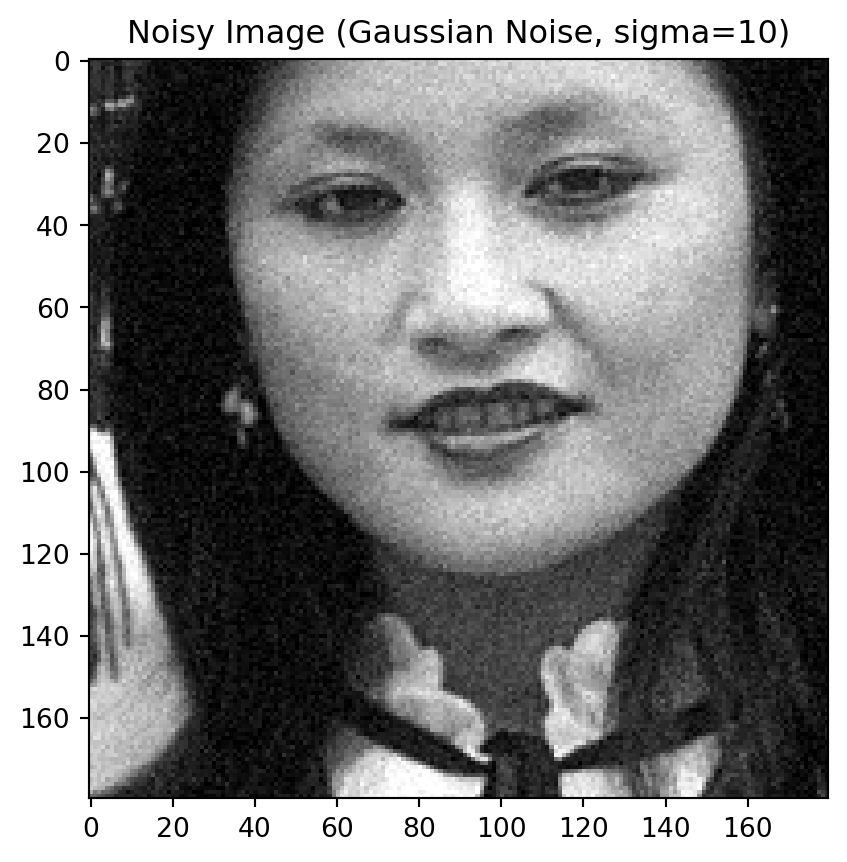

In [2]:
#| code-overflow: wrap
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Load the Lena image
lena = cv2.imread('/Denoising-Manuscript/images/first.png', cv2.IMREAD_GRAYSCALE)

# Function to add Gaussian noise
def add_gaussian_noise(image, sigma):
    row, col = image.shape
    mean = 0
    gauss = np.random.normal(mean, sigma, (row, col))
    noisy_image = image + gauss
    noisy_image = np.clip(noisy_image, 0, 255)  # Clip values to [0, 255]
    return noisy_image.astype(np.uint8)

# Adding Gaussian noise with a lower sigma (e.g., sigma=10 for less noise)
noisy_lena = add_gaussian_noise(lena, sigma=10)

# Display noisy image
plt.figure(figsize=(8, 5))
plt.imshow(noisy_lena, cmap='gray')
plt.title('Noisy Image (Gaussian Noise, sigma=10)')
plt.show()

1.  Gaussian Smoothing in Python Gaussian smoothing can be applied using the following code:

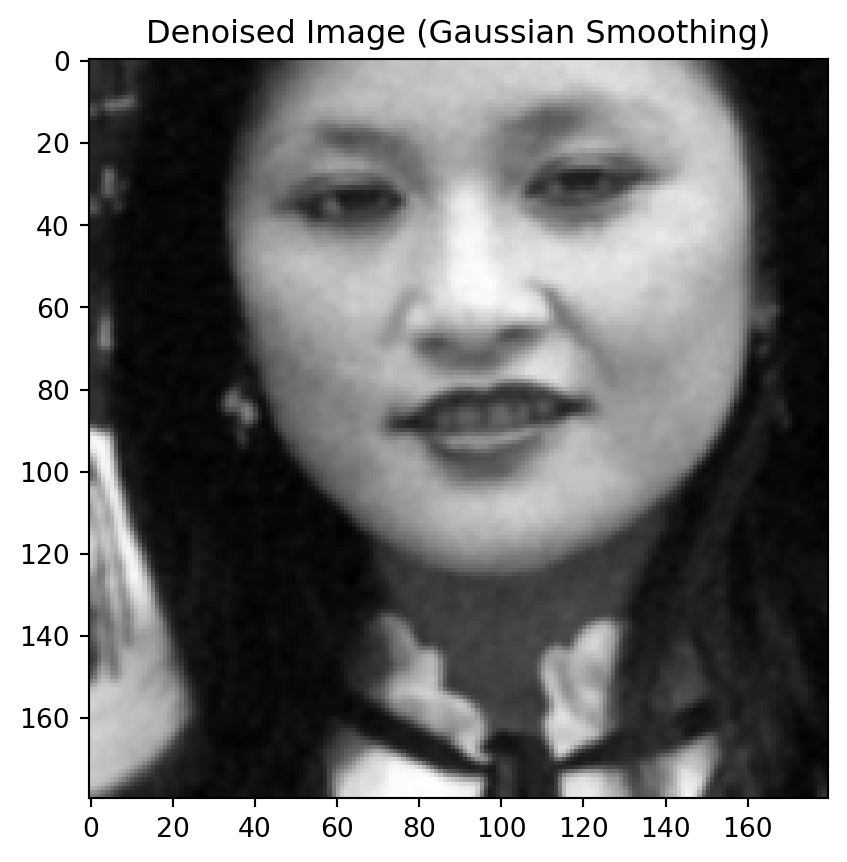

In [3]:
#| code-overflow: wrap
# Apply Gaussian smoothing
smoothed_lena = cv2.GaussianBlur(noisy_lena, (5, 5), sigmaX=1)

# Display the denoised image
plt.figure(figsize=(8, 5))
plt.title("Denoised Image (Gaussian Smoothing)")
plt.imshow(smoothed_lena, cmap='gray')
plt.show()

1.  Median Filtering in Python

To apply median filtering:

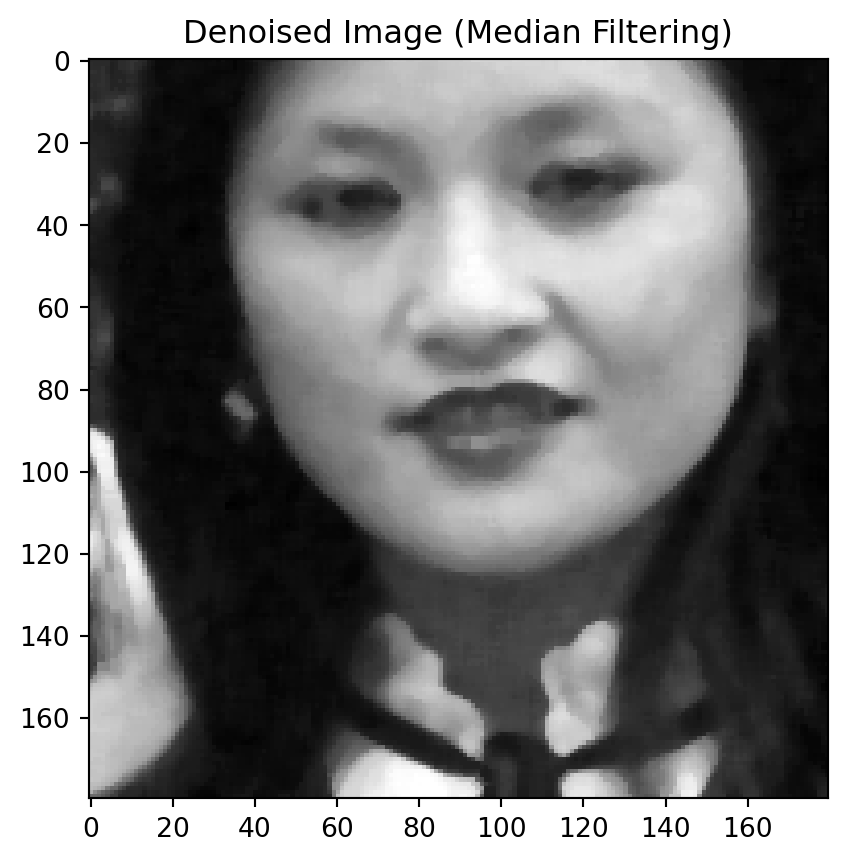

In [4]:
#| code-overflow: wrap
# Apply Median filtering
median_lena = cv2.medianBlur(noisy_lena, 5)

# Display the denoised image
plt.figure(figsize=(8, 5))
plt.title("Denoised Image (Median Filtering)")
plt.imshow(median_lena, cmap='gray')
plt.show()

1.  Non-Local means denoising

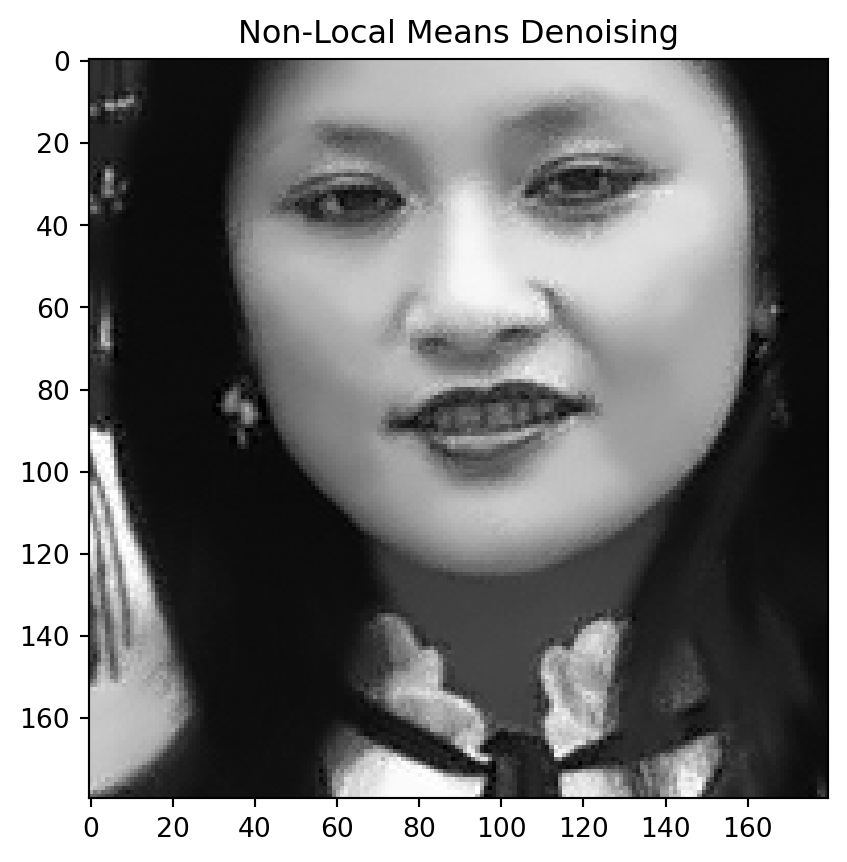

In [5]:
#| code-overflow: wrap
# Apply Non-Local Means denoising (cv2.fastNlMeansDenoising for grayscale)
nlmeans_denoised_lena = cv2.fastNlMeansDenoising(noisy_lena, h=10, templateWindowSize=7, searchWindowSize=21)

# Display the result
plt.figure(figsize=(8, 5))
plt.imshow(nlmeans_denoised_lena, cmap='gray')
plt.title('Non-Local Means Denoising')
plt.show()

1.  Bilateral filtering

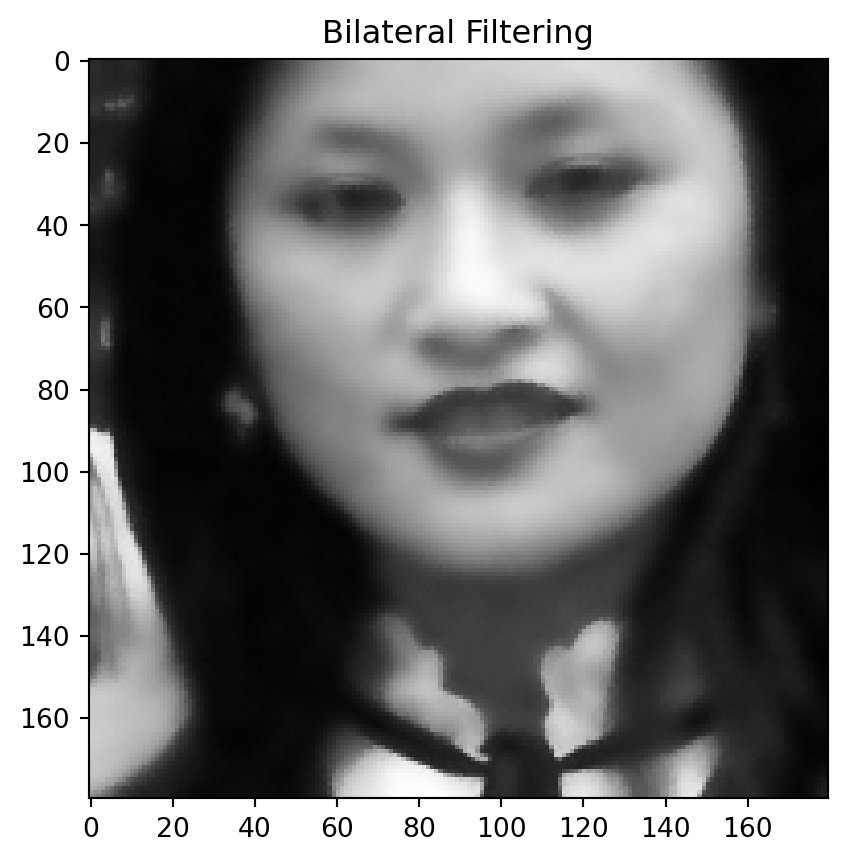

In [6]:
#| code-overflow: wrap
# Apply Bilateral Filter
bilateral_denoised = cv2.bilateralFilter(noisy_lena, d=9, sigmaColor=75, sigmaSpace=75)

# Display the result
plt.figure(figsize=(8, 5))
plt.imshow(bilateral_denoised, cmap='gray')
plt.title('Bilateral Filtering')
plt.show()

1.  Weinner denoiser

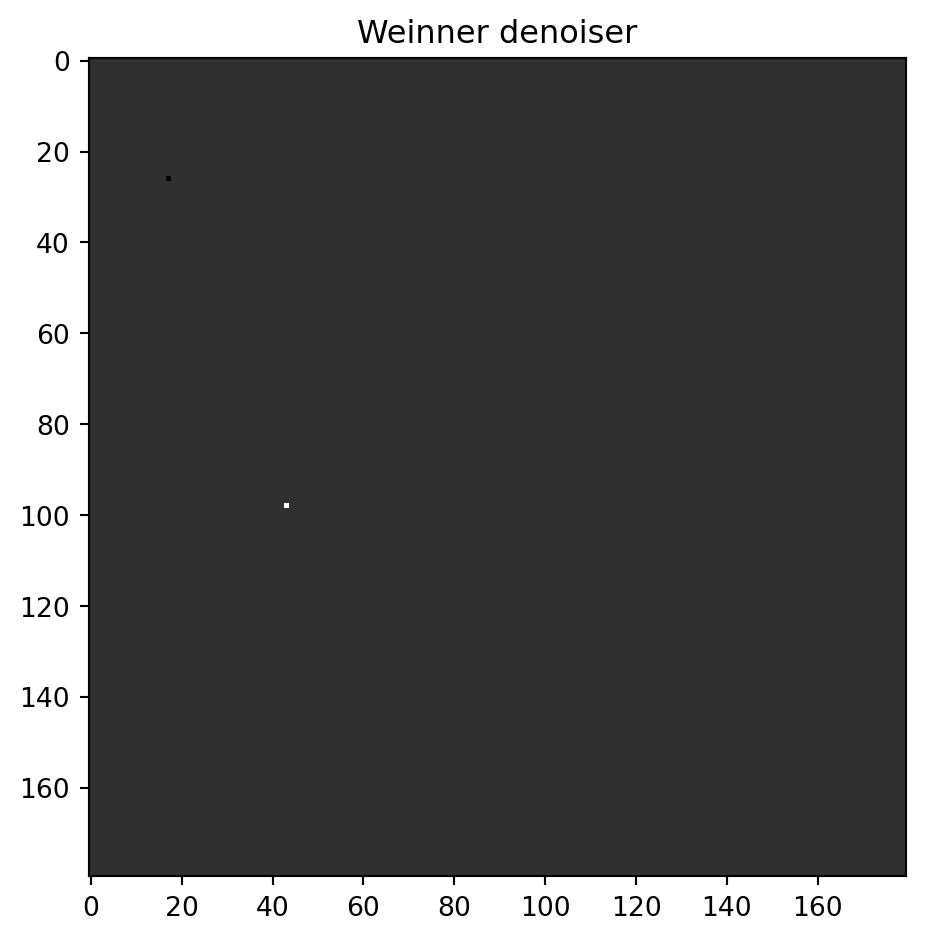

In [7]:
#| code-overflow: wrap
from scipy.signal import wiener

# Apply Wiener Filtering
denoised_image = wiener(noisy_lena)
# Display the result
plt.figure(figsize=(8, 5))
plt.imshow(denoised_image, cmap='gray')
plt.title('Weinner denoiser')
plt.tight_layout()
plt.show()

> **Reason for worst denoising effect**
>
> In this case, adding Gaussian noise makes the noise stationary, but if the underlying image is non-stationary (as most images are), the Wiener filter may struggle to achieve optimal results. It treats all areas of the image uniformly, without taking into account the local variations (edges, textures), which leads to suboptimal denoising.

To improve the performance of denoising in such cases, advanced techniques (e.g., BM3D, non-local means) that adapt to local variations in the image are generally more effective.

From these illustrations, let’s go for the simplest case but reasonably fit to our learning needs- the Gaussian smoothing. As an experiment to optimize the image denoising with optimal paramters, an iterative approach is used as shown below. Here the adopted procedure is:

*Define a Metric for Error:* Calculate the error between the denoised image and the original image. Common metrics include Mean Squared Error (MSE) and Peak Signal-to-Noise Ratio (PSNR).

*Vary Parameters:* Experiment with different values for the kernel size and sigmaX to see which combination provides the best performance.

*Evaluate and Choose the Best Parameters:* Use the defined error metric to compare different parameter settings and select the ones with the lowest error.

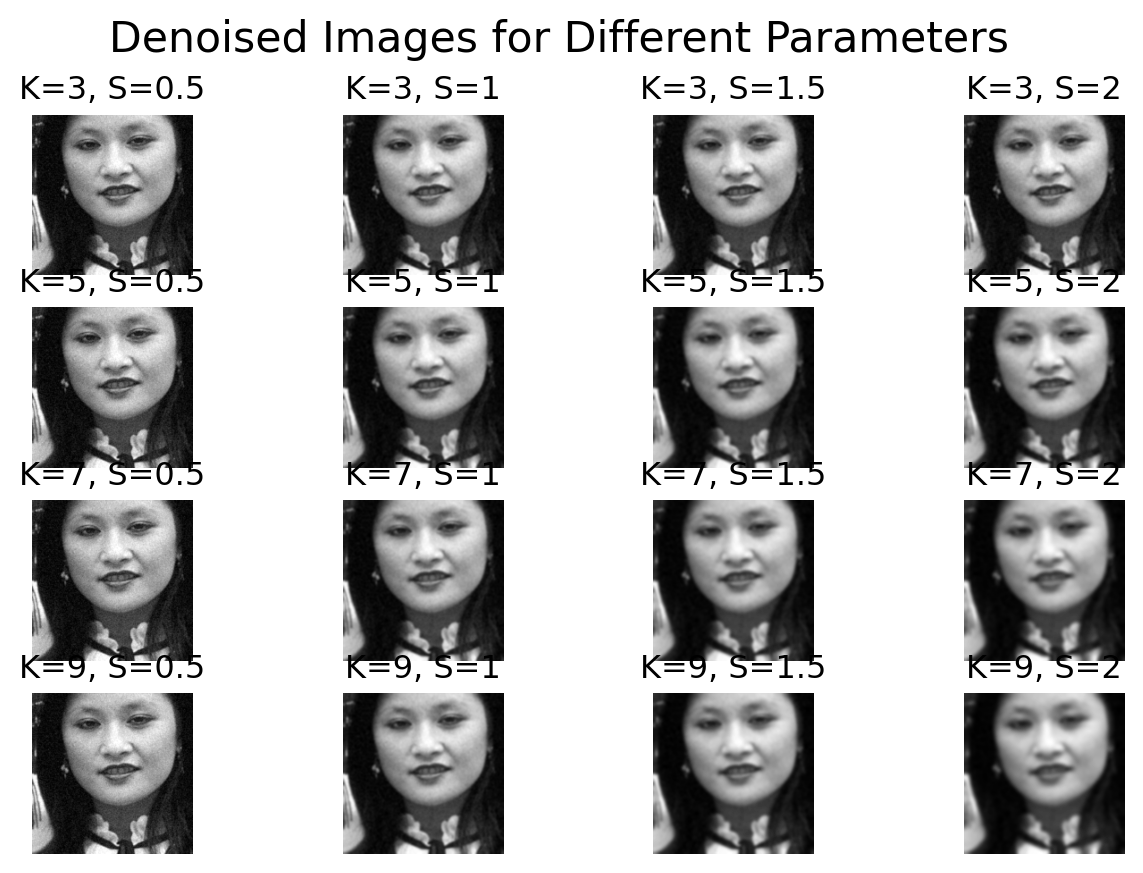

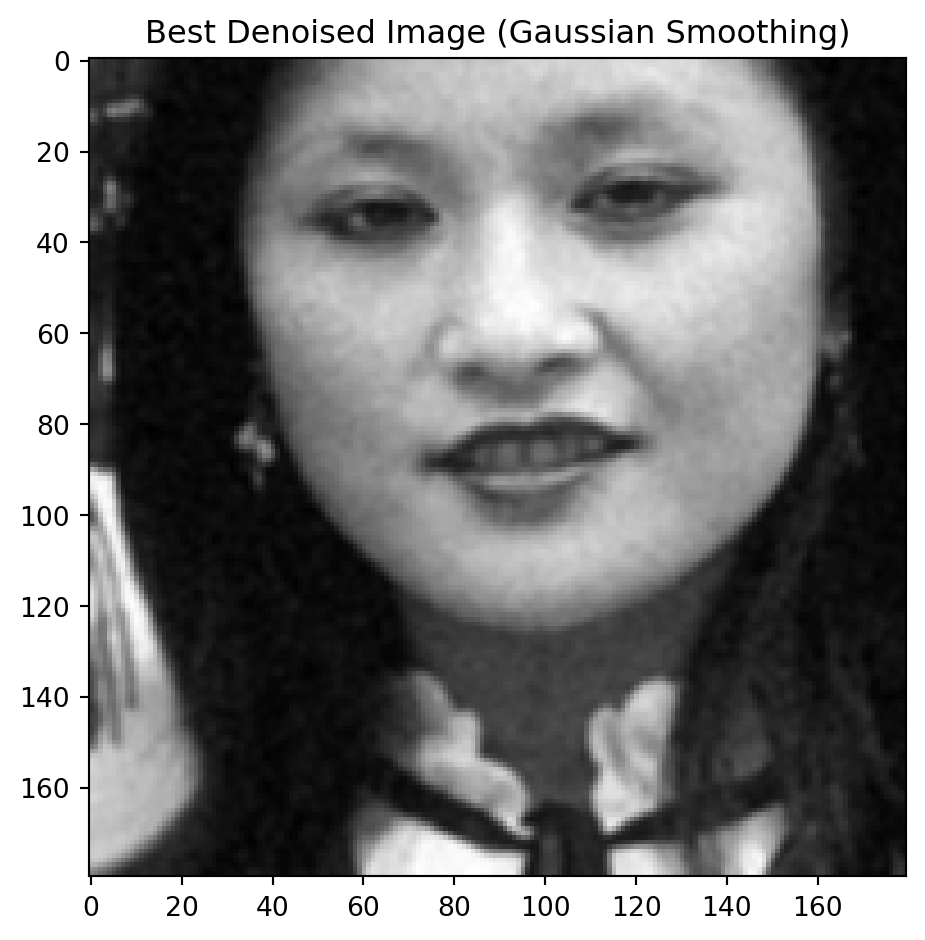

Best parameters: Kernel Size = 3, SigmaX = 1
Best MSE: 25.893641975308643

In [8]:
#| code-overflow: wrap
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Load the Lena image
lena = cv2.imread('/Denoising-Manuscript/images/first.png', cv2.IMREAD_GRAYSCALE)

# Function to add Gaussian noise
def add_gaussian_noise(image, sigma):
    row, col = image.shape
    mean = 0
    gauss = np.random.normal(mean, sigma, (row, col))
    noisy_image = image + gauss
    noisy_image = np.clip(noisy_image, 0, 255)  # Clip values to [0, 255]
    return noisy_image.astype(np.uint8)

# Function to compute MSE
def compute_mse(original, denoised):
    return mean_squared_error(original.flatten(), denoised.flatten())

# Function to apply Gaussian smoothing
def apply_gaussian_smoothing(noisy_image, ksize, sigmaX):
    return cv2.GaussianBlur(noisy_image, (ksize, ksize), sigmaX=sigmaX)

# Create noisy image
noisy_lena = add_gaussian_noise(lena, sigma=10)

# Define parameter ranges
kernel_sizes = [3, 5, 7, 9]  # Example kernel sizes
sigmaXs = [0.5, 1, 1.5, 2]   # Example sigmaX values

# Variables to keep track of best parameters
best_mse = float('inf')
best_params = (None, None)
best_denoised_image = None

# Prepare subplots
fig, axes = plt.subplots(len(kernel_sizes), len(sigmaXs), figsize=(8, 5))
fig.suptitle('Denoised Images for Different Parameters', fontsize=16)

for i, ksize in enumerate(kernel_sizes):
    for j, sigmaX in enumerate(sigmaXs):
        # Apply Gaussian smoothing
        smoothed_lena = apply_gaussian_smoothing(noisy_lena, ksize, sigmaX)
        
        # Compute MSE
        mse = compute_mse(lena, smoothed_lena)
        
        # Update best parameters if this is the best MSE
        if mse < best_mse:
            best_mse = mse
            best_params = (ksize, sigmaX)
            best_denoised_image = smoothed_lena
        
        # Display the image in subplot
        ax = axes[i, j]
        ax.imshow(smoothed_lena, cmap='gray')
        ax.set_title(f'K={ksize}, S={sigmaX}')
        ax.axis('off')

# Display the best denoised image
plt.figure()
plt.title("Best Denoised Image (Gaussian Smoothing)")
plt.imshow(best_denoised_image, cmap='gray')
plt.tight_layout()
plt.show()
print(f"Best parameters: Kernel Size = {best_params[0]}, SigmaX = {best_params[1]}")
print(f"Best MSE: {best_mse}")

Mean Square Error is a common but imperfect measure of image quality. MSE focuses on pixel-wise differences, which may not correlate well with perceptual image quality. An image can have low MSE but still appear blurry or lack important details. Newer algorithms often aim to balance MSE minimization with other perceptually relevant metrics, leading to better subjective image quality even if the MSE is slightly higher.

Peak signal-to-noise ratio (PSNR) is an engineering term for the ratio between the maximum possible power of a signal and the power of corrupting noise that affects the fidelity of its representation. It is a common metric used to assess the quality of the denoised image defined as:

$$ \text{PSNR}=10\log_{10}\left(\frac{\text{Max}_i^2}{\text{MSE}}\right)$$

where $\text{MAX}_i$ is the maximum possible pixel value of the image, and MSE is the mean squared error between the ground truth and the denoised image. A `Python` implementation that replaces MSE with PSNR is shown below.

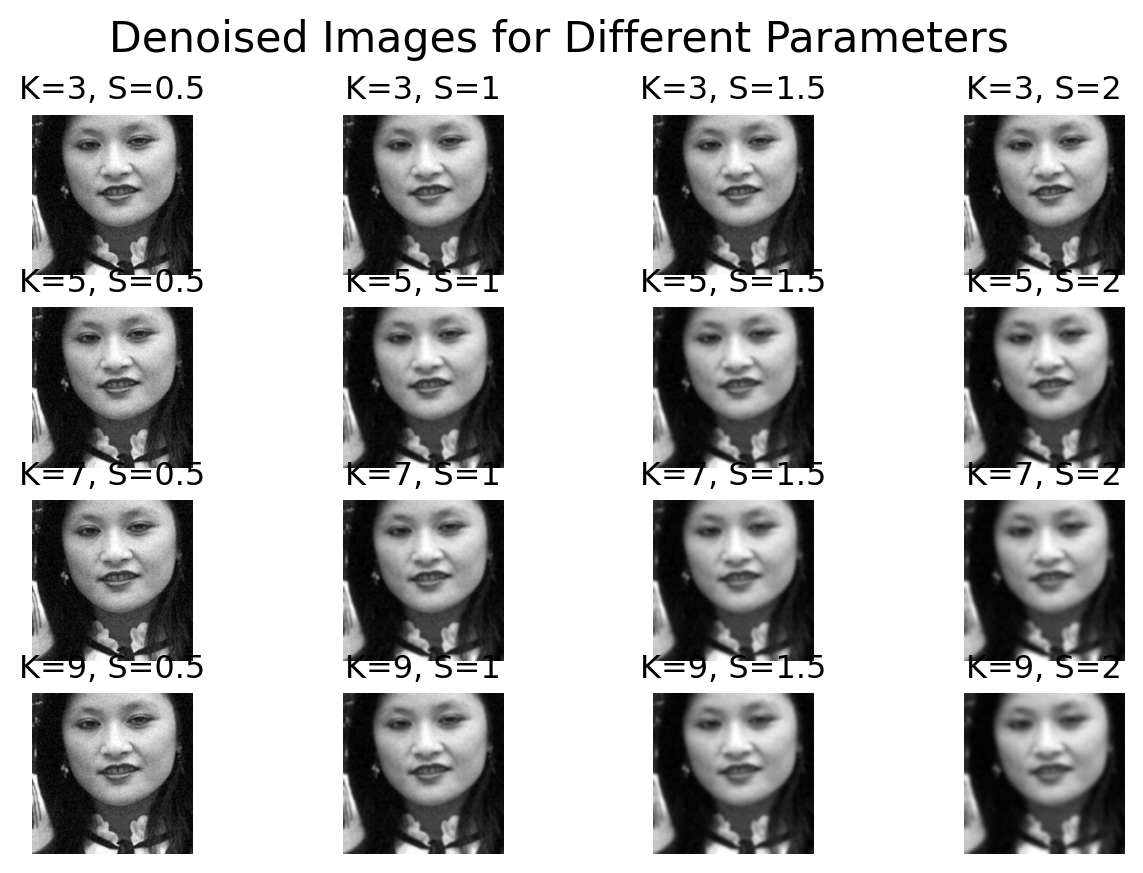

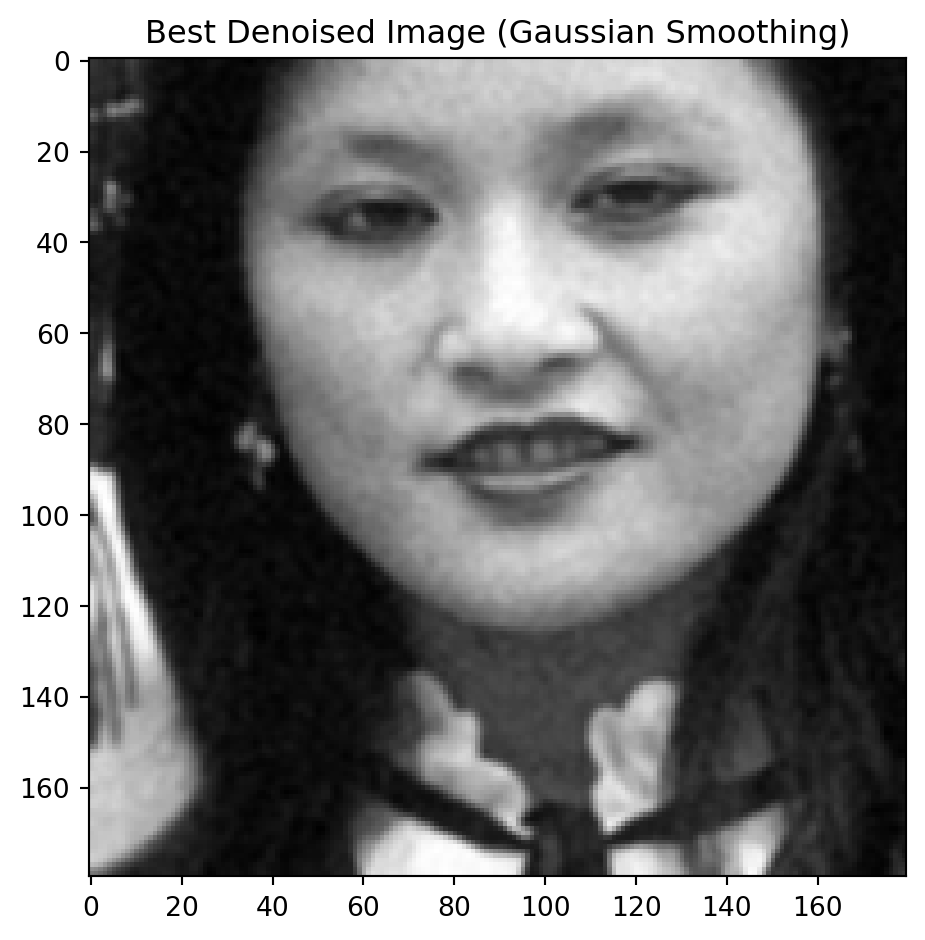

Best parameters: Kernel Size = 3, SigmaX = 1
Best PSNR: 34.01536514475295 dB

In [9]:
#| code-overflow: wrap
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Load the Lena image
lena = cv2.imread('/Denoising-Manuscript/images/first.png', cv2.IMREAD_GRAYSCALE)

# Function to add Gaussian noise
def add_gaussian_noise(image, sigma):
    row, col = image.shape
    mean = 0
    gauss = np.random.normal(mean, sigma, (row, col))
    noisy_image = image + gauss
    noisy_image = np.clip(noisy_image, 0, 255)  # Clip values to [0, 255]
    return noisy_image.astype(np.uint8)

# Function to compute PSNR
def compute_psnr(original, denoised):
    mse = mean_squared_error(original.flatten(), denoised.flatten())
    if mse == 0:
        return 100  # Perfect match
    max_pixel = 255.0
    return 20 * np.log10(max_pixel / np.sqrt(mse))

# Function to apply Gaussian smoothing
def apply_gaussian_smoothing(noisy_image, ksize, sigmaX):
    return cv2.GaussianBlur(noisy_image, (ksize, ksize), sigmaX=sigmaX)

# Create noisy image
noisy_lena = add_gaussian_noise(lena, sigma=10)

# Define parameter ranges
kernel_sizes = [3, 5, 7, 9]  # Example kernel sizes
sigmaXs = [0.5, 1, 1.5, 2]   # Example sigmaX values

# Variables to keep track of best parameters
best_psnr = -float('inf')
best_params = (None, None)
best_denoised_image = None

# Prepare subplots
fig, axes = plt.subplots(len(kernel_sizes), len(sigmaXs), figsize=(8, 5))
fig.suptitle('Denoised Images for Different Parameters', fontsize=16)

for i, ksize in enumerate(kernel_sizes):
    for j, sigmaX in enumerate(sigmaXs):
        # Apply Gaussian smoothing
        smoothed_lena = apply_gaussian_smoothing(noisy_lena, ksize, sigmaX)
        
        # Compute PSNR
        psnr = compute_psnr(lena, smoothed_lena)
        
        # Update best parameters if this is the best PSNR
        if psnr > best_psnr:
            best_psnr = psnr
            best_params = (ksize, sigmaX)
            best_denoised_image = smoothed_lena
        
        # Display the image in subplot
        ax = axes[i, j]
        ax.imshow(smoothed_lena, cmap='gray')
        ax.set_title(f'K={ksize}, S={sigmaX}')
        ax.axis('off')

# Display the best denoised image
plt.figure()
plt.title("Best Denoised Image (Gaussian Smoothing)")
plt.imshow(best_denoised_image, cmap='gray')
plt.tight_layout()
plt.show()

print(f"Best parameters: Kernel Size = {best_params[0]}, SigmaX = {best_params[1]}")
print(f"Best PSNR: {best_psnr} dB")

In this experiment, both the approaches produced the same result!

Next we consider a more general situation. Suppose 20 noisy images of the same clean image are avaiable. Need to denoise all the images at the best level. There are two approaches for this situation.

1.  Apply denoising algorithm with varying parameters on all 20 noisy images, and identify the best parameters using MSE or PSNR metric. Finally use these best parameters on all noised images to denoise to the optimum.

2.  Use a same approach in the first part. But instead of using the best parameters, use the parameters of the *most likely* MSE or PSNR measure for final denoising.

Python implementation of the second approach is given below.

Best parameters: Kernel Size = 3, SigmaX = 1
Best Average PSNR: 34.07920191455078 dB

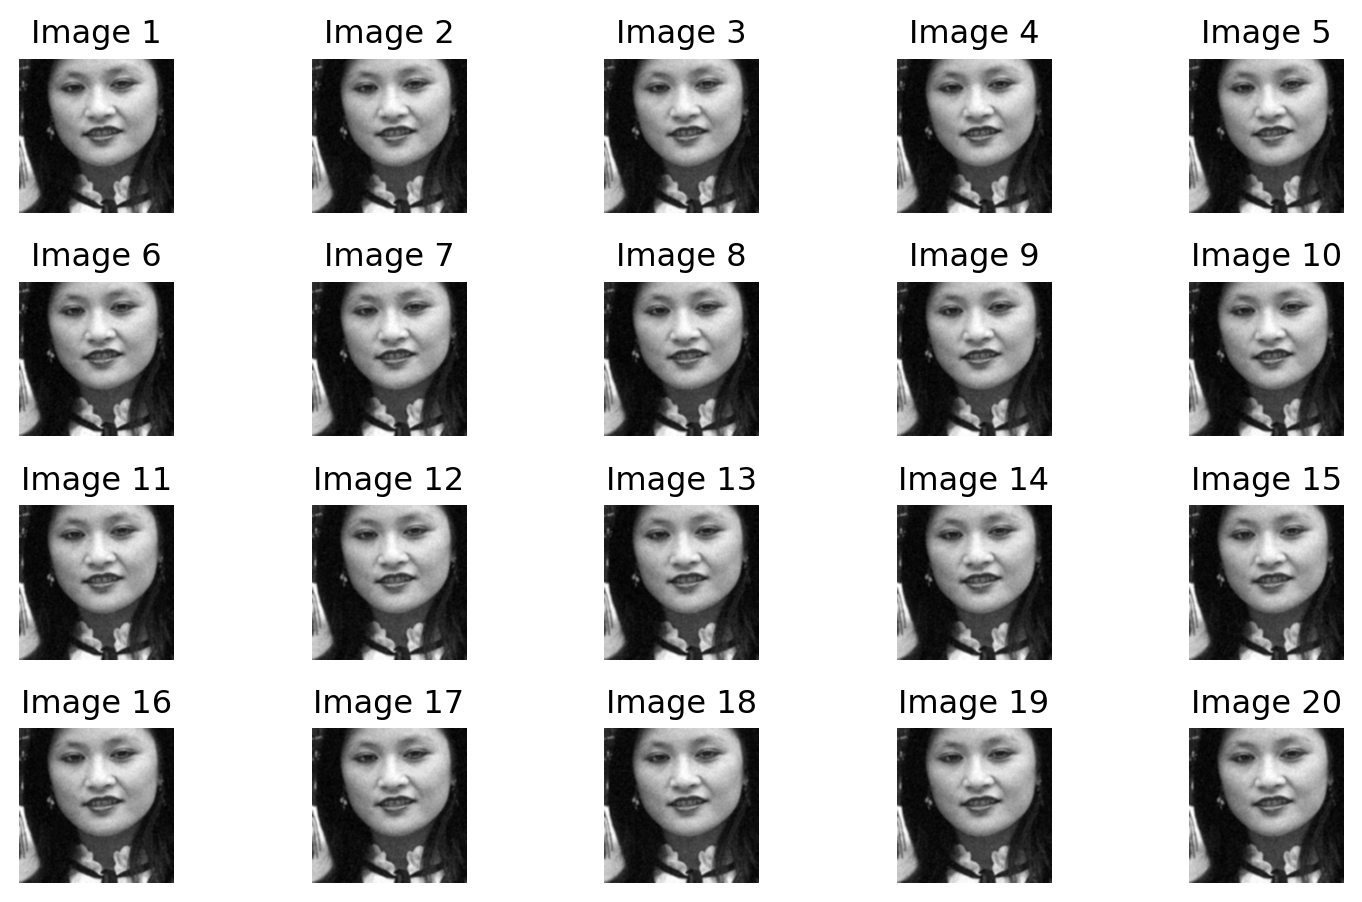

In [10]:
#| code-overflow: wrap
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Load the Lena image
lena = cv2.imread('/Denoising-Manuscript/images/first.png', cv2.IMREAD_GRAYSCALE)

# Function to add Gaussian noise
def add_gaussian_noise(image, sigma):
    row, col = image.shape
    mean = 0
    gauss = np.random.normal(mean, sigma, (row, col))
    noisy_image = image + gauss
    noisy_image = np.clip(noisy_image, 0, 255)  # Clip values to [0, 255]
    return noisy_image.astype(np.uint8)

# Function to compute PSNR
def compute_psnr(original, denoised):
    mse = mean_squared_error(original.flatten(), denoised.flatten())
    if mse == 0:
        return 100  # Perfect match
    max_pixel = 255.0
    return 20 * np.log10(max_pixel / np.sqrt(mse))

# Function to apply Gaussian smoothing
def apply_gaussian_smoothing(noisy_image, ksize, sigmaX):
    return cv2.GaussianBlur(noisy_image, (ksize, ksize), sigmaX=sigmaX)

# Create 20 noisy images
num_noisy_images = 20
noisy_images = [add_gaussian_noise(lena, sigma=10) for _ in range(num_noisy_images)]

# Define parameter ranges
kernel_sizes = [3, 5, 7, 9]  # Example kernel sizes
sigmaXs = [0.5, 1, 1.5, 2]   # Example sigmaX values

# Variables to keep track of best parameters
best_psnr = -float('inf')
best_params = (None, None)

# Evaluate parameters on the dataset
for ksize in kernel_sizes:
    for sigmaX in sigmaXs:
        psnr_total = 0
        for noisy_img in noisy_images:
            # Apply Gaussian smoothing
            smoothed_img = apply_gaussian_smoothing(noisy_img, ksize, sigmaX)
            
            # Compute PSNR
            psnr = compute_psnr(lena, smoothed_img)
            psnr_total += psnr
        
        # Average PSNR for this parameter set
        avg_psnr = psnr_total / num_noisy_images
        
        # Update best parameters if this is the best PSNR
        if avg_psnr > best_psnr:
            best_psnr = avg_psnr
            best_params = (ksize, sigmaX)

print(f"Best parameters: Kernel Size = {best_params[0]}, SigmaX = {best_params[1]}")
print(f"Best Average PSNR: {best_psnr} dB")

# Prepare subplots
rows = 4
cols = 5
fig, axes = plt.subplots(rows, cols, figsize=(8, 5))

# Flatten axes array for easy indexing
axes = axes.flatten()

# Apply optimal parameters to noisy images and display
for i, noisy_img in enumerate(noisy_images):
    # Apply Gaussian smoothing with optimal parameters
    denoised_img = apply_gaussian_smoothing(noisy_img, best_params[0], best_params[1])
    
    # Display the denoised image in subplot
    ax = axes[i]
    ax.imshow(denoised_img, cmap='gray')
    ax.set_title(f"Image {i+1}")
    ax.axis('off')

# Hide any unused subplots
for j in range(num_noisy_images, rows * cols):
    axes[j].axis('off')

# Adjust layout and display the plot
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

## Landing to the background of the article

Is it possible to create a high-quality denoised image from a set of noisy images, even if we don’t have the clean reference image?

Sure. This classical technique is commonly referred to as image denoising through *ensemble methods* or *image fusion*. The idea is to leverage the fact that each noisy image contains some useful information, and by combining these images effectively, one can obtain a better denoised result. This seems to be more realistic in application view point.

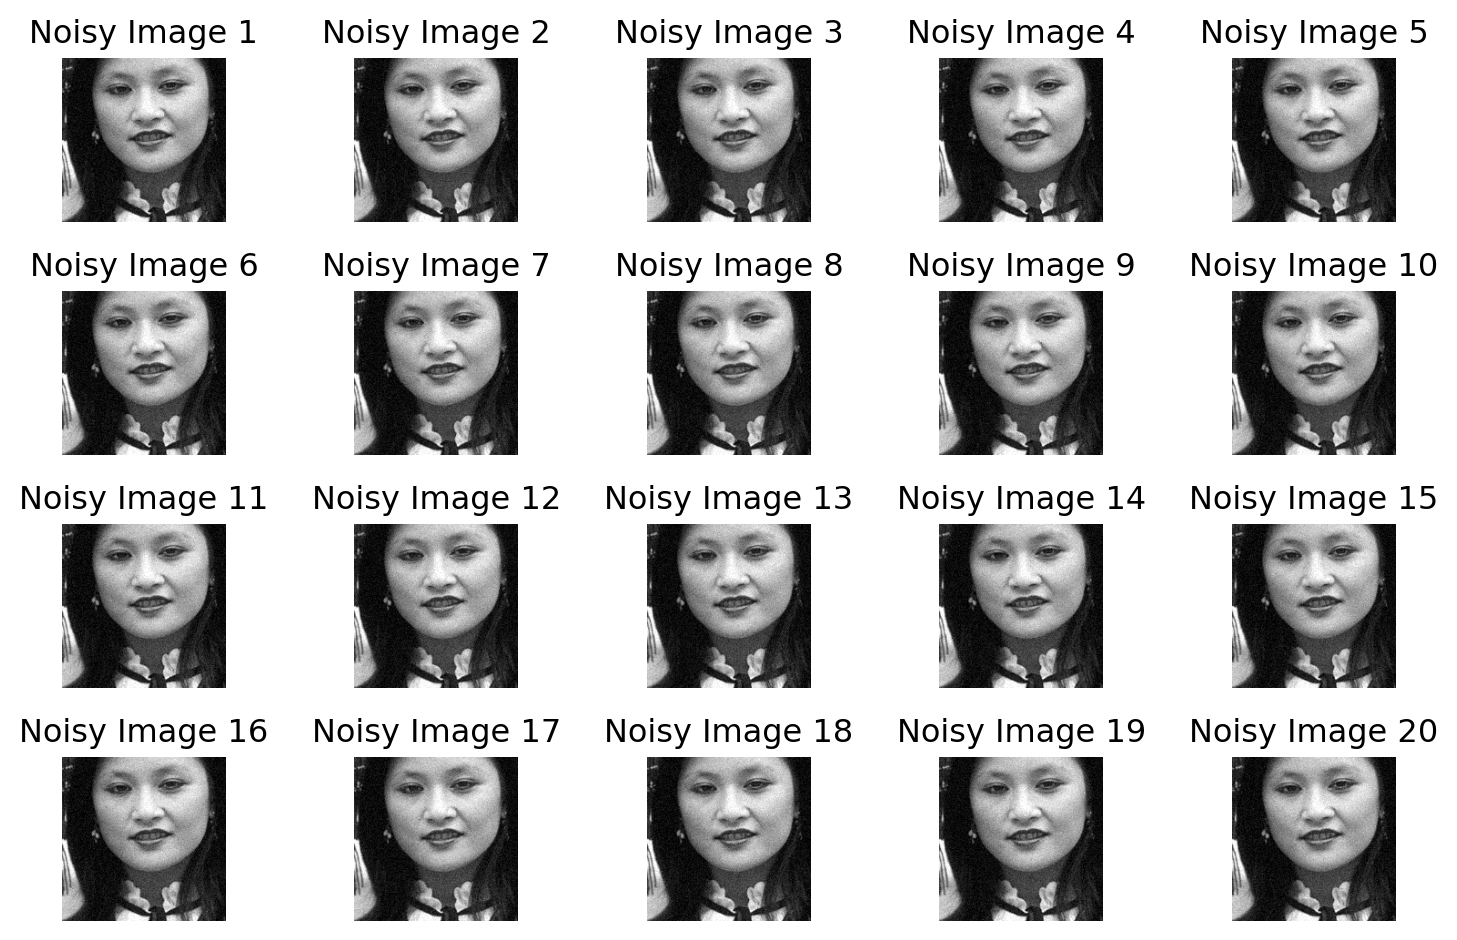

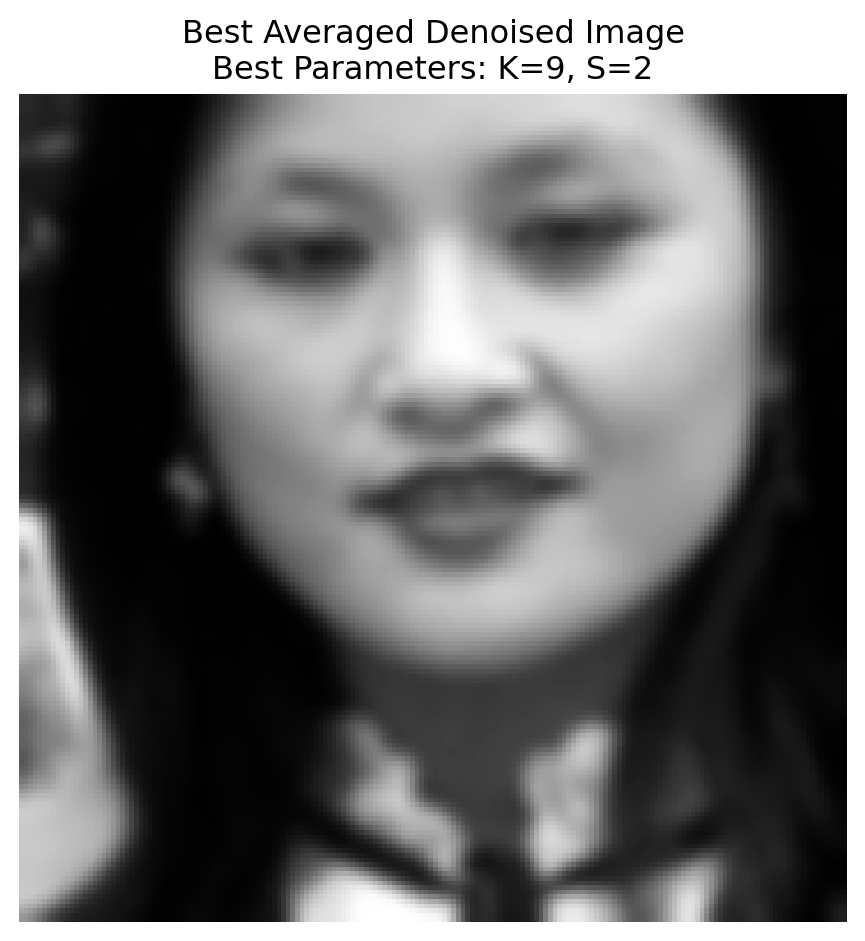

Best parameters: Kernel Size = 9, SigmaX = 2
Best Average MSE: 4.403501461988306

In [11]:
#| code-overflow: wrap
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Function to add Gaussian noise
def add_gaussian_noise(image, sigma):
    row, col = image.shape
    mean = 0
    gauss = np.random.normal(mean, sigma, (row, col))
    noisy_image = image + gauss
    noisy_image = np.clip(noisy_image, 0, 255)  # Clip values to [0, 255]
    return noisy_image.astype(np.uint8)

# Function to compute Mean Squared Error (MSE) between two images
def compute_mse(image1, image2):
    return mean_squared_error(image1.flatten(), image2.flatten())

# Load the clean image
lena = cv2.imread('/Denoising-Manuscript/images/first.png', cv2.IMREAD_GRAYSCALE)

# Number of noisy images to generate
num_noisy_images = 20
sigma = 10  # Standard deviation for Gaussian noise

# Generate noisy images
noisy_images = [add_gaussian_noise(lena, sigma) for _ in range(num_noisy_images)]

# Define parameter ranges for denoising
kernel_sizes = [3, 5, 7, 9]
sigmaXs = [0.5, 1, 1.5, 2]

# Variables to keep track of best parameters
best_mse = float('inf')
best_params = (None, None)
best_denoised_images = []

# Perform denoising for different parameters
for ksize in kernel_sizes:
    for sigmaX in sigmaXs:
        denoised_images = []
        for noisy_img in noisy_images:
            # Apply Gaussian smoothing
            smoothed_img = cv2.GaussianBlur(noisy_img, (ksize, ksize), sigmaX=sigmaX)
            denoised_images.append(smoothed_img)
        
        # Convert list to numpy array for easy manipulation
        denoised_images = np.array(denoised_images)

        # Compute the average of all denoised images
        average_denoised_image = np.mean(denoised_images, axis=0)
        average_denoised_image = np.clip(average_denoised_image, 0, 255).astype(np.uint8)

        # Compute the mean squared error (MSE) between all pairs of denoised images
        mse_total = 0
        count = 0
        for i in range(len(denoised_images)):
            for j in range(i + 1, len(denoised_images)):
                mse_total += compute_mse(denoised_images[i], denoised_images[j])
                count += 1
        
        # Average MSE
        mse_avg = mse_total / count if count > 0 else float('inf')

        # Update best parameters if this is the best MSE
        if mse_avg < best_mse:
            best_mse = mse_avg
            best_params = (ksize, sigmaX)
            best_denoised_images = denoised_images

# Compute the average image from the best denoised images
average_best_denoised_image = np.mean(best_denoised_images, axis=0)
average_best_denoised_image = np.clip(average_best_denoised_image, 0, 255).astype(np.uint8)

# Display the averaged denoised images
fig, axes = plt.subplots(4, 5, figsize=(8, 5))
for i in range(4):
    for j in range(5):
        idx = i * 5 + j
        if idx < len(noisy_images):
            axes[i, j].imshow(noisy_images[idx], cmap='gray')
            axes[i, j].set_title(f'Noisy Image {idx+1}')
            axes[i, j].axis('off')

plt.tight_layout()
plt.show()

# Display the best denoised image
plt.figure(figsize=(8, 5))
plt.imshow(average_best_denoised_image, cmap='gray')
plt.title(f"Best Averaged Denoised Image\nBest Parameters: K={best_params[0]}, S={best_params[1]}")
plt.axis('off')
plt.tight_layout()
plt.show()

# Print best parameters and MSE
print(f"Best parameters: Kernel Size = {best_params[0]}, SigmaX = {best_params[1]}")
print(f"Best Average MSE: {best_mse}")

Instead of MSE, the PSNR metric can be used. Here the comparison is with another *noisy image*.

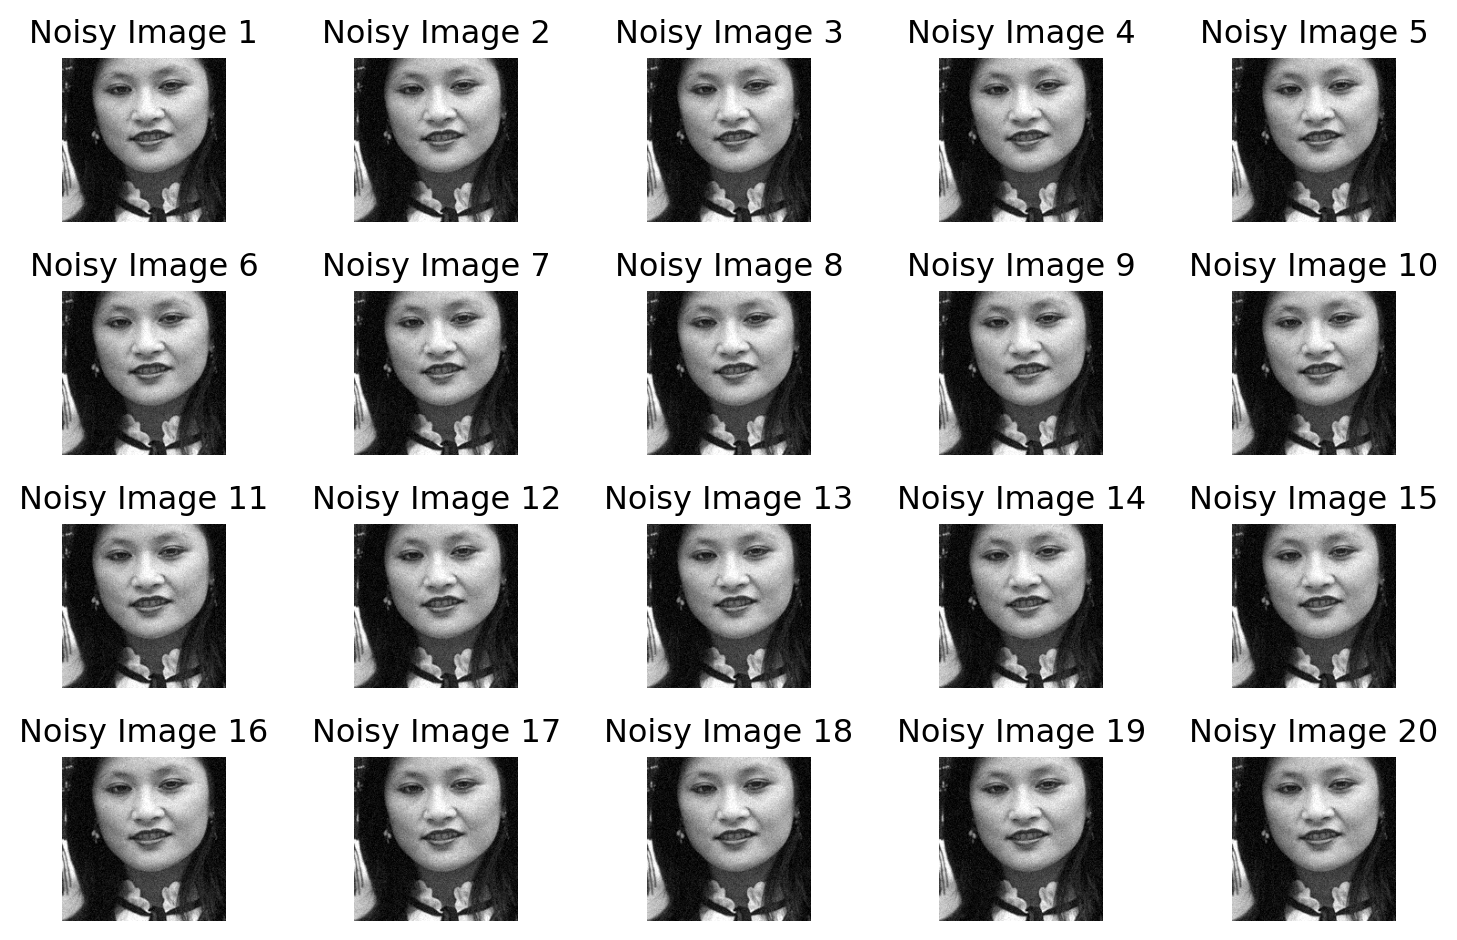

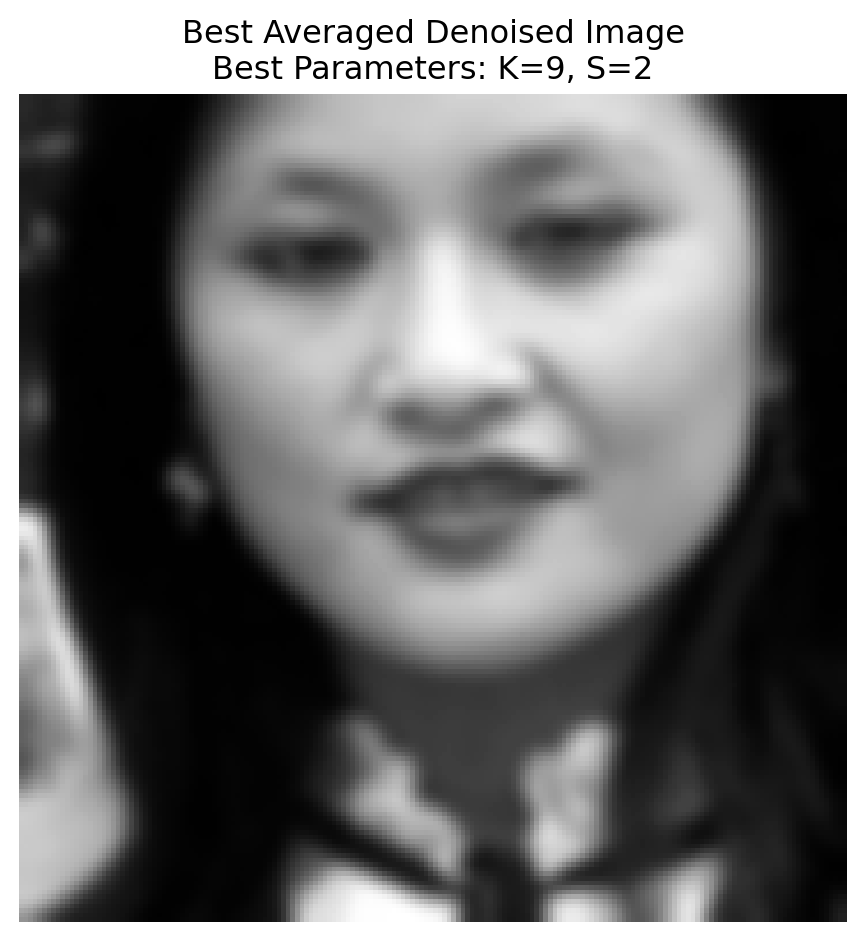

Best parameters: Kernel Size = 9, SigmaX = 2
Best Average PSNR: 41.71662403691973

In [12]:
#| code-overflow: wrap
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Function to calculate PSNR
def calculate_psnr(original, denoised):
    mse = np.mean((original - denoised) ** 2)
    if mse == 0:
        return float('inf')  # PSNR is infinite for identical images
    max_pixel = 255.0
    psnr = 10 * np.log10((max_pixel ** 2) / mse)
    return psnr

# Function to add Gaussian noise
def add_gaussian_noise(image, sigma):
    row, col = image.shape
    mean = 0
    gauss = np.random.normal(mean, sigma, (row, col))
    noisy_image = image + gauss
    noisy_image = np.clip(noisy_image, 0, 255)  # Clip values to [0, 255]
    return noisy_image.astype(np.uint8)

# Load the clean image
lena = cv2.imread('/Denoising-Manuscript/images/first.png', cv2.IMREAD_GRAYSCALE)

# Number of noisy images to generate
num_noisy_images = 20
sigma = 10  # Standard deviation for Gaussian noise

# Generate noisy images
noisy_images = [add_gaussian_noise(lena, sigma) for _ in range(num_noisy_images)]

# Define parameter ranges for denoising
kernel_sizes = [3, 5, 7, 9]
sigmaXs = [0.5, 1, 1.5, 2]

# Variables to keep track of best parameters
best_psnr = float('-inf')
best_params = (None, None)
best_denoised_images = []

# Perform denoising for different parameters
for ksize in kernel_sizes:
    for sigmaX in sigmaXs:
        denoised_images = []
        for noisy_img in noisy_images:
            # Apply Gaussian smoothing
            smoothed_img = cv2.GaussianBlur(noisy_img, (ksize, ksize), sigmaX=sigmaX)
            denoised_images.append(smoothed_img)
        
        # Convert list to numpy array for easy manipulation
        denoised_images = np.array(denoised_images)

        # Compute the average of all denoised images
        average_denoised_image = np.mean(denoised_images, axis=0)
        average_denoised_image = np.clip(average_denoised_image, 0, 255).astype(np.uint8)

        # Compute the average PSNR between all pairs of denoised images
        psnr_total = 0
        count = 0
        for i in range(len(denoised_images)):
            for j in range(i + 1, len(denoised_images)):
                psnr_total += calculate_psnr(denoised_images[i], denoised_images[j])
                count += 1
        
        # Average PSNR
        psnr_avg = psnr_total / count if count > 0 else float('-inf')

        # Update best parameters if this is the best PSNR
        if psnr_avg > best_psnr:
            best_psnr = psnr_avg
            best_params = (ksize, sigmaX)
            best_denoised_images = denoised_images

# Compute the average image from the best denoised images
average_best_denoised_image = np.mean(best_denoised_images, axis=0)
average_best_denoised_image = np.clip(average_best_denoised_image, 0, 255).astype(np.uint8)

# Display the averaged denoised images
fig, axes = plt.subplots(4, 5, figsize=(8, 5))
for i in range(4):
    for j in range(5):
        idx = i * 5 + j
        if idx < len(noisy_images):
            axes[i, j].imshow(noisy_images[idx], cmap='gray')
            axes[i, j].set_title(f'Noisy Image {idx+1}')
            axes[i, j].axis('off')

plt.tight_layout()
plt.show()

# Display the best denoised image
plt.figure(figsize=(8, 5))
plt.imshow(average_best_denoised_image, cmap='gray')
plt.title(f"Best Averaged Denoised Image\nBest Parameters: K={best_params[0]}, S={best_params[1]}")
plt.axis('off')
plt.tight_layout()
plt.show()

# Print best parameters and PSNR
print(f"Best parameters: Kernel Size = {best_params[0]}, SigmaX = {best_params[1]}")
print(f"Best Average PSNR: {best_psnr}")

In this article, authors refer that, in the context of image denoising with Gaussian noise, *Generalized Cross Validation (GCV)* and \*\*Stein’s Unbiased Risk Estimate (SURE)\* are used to estimate the performance of denoising algorithms without requiring a clean reference image. A review of these topics from fundamentals of image processing provides following key insights.

### Generalized Cross Validation (GCV)

Generalized Cross Validation is a technique used to estimate the optimal parameters of a model by minimizing an estimate of the prediction error. In image denoising, GCV helps in selecting the best parameters for a denoising algorithm without needing a clean reference image.

Steps in using GCV are:

1.  *Model and Data*: Apply a denoising algorithm with different parameter settings to the noisy image.
2.  *Estimate Residuals*: For each parameter setting, compute an estimate of the residual error. This involves calculating how well the model predicts the noisy image based on the parameters.
3.  *Optimize Parameters*: Choose the parameters that minimize the generalized cross-validation criterion, which is an estimate of the prediction error.

**Mathematical Formulation:**

For Gaussian noise, GCV often involves minimizing the following criterion:

$$
\text{GCV}(\lambda) = \frac{1}{n} \sum_{i=1}^n \frac{(y_i - \hat{y}_i)^2}{(1 - h_i)^2}
$$

where: - $y_i$ is the observed noisy value. - $\hat{y}_i$ is the estimated value from the denoising model. - $h_i$ is the leverage or influence of the $i$-th observation.

### Stein’s Unbiased Risk Estimate (SURE)

Stein’s Unbiased Risk Estimate provides an estimate of the mean squared error (MSE) of an estimator without needing the true clean image. It is particularly useful for choosing regularization parameters in denoising problems.

Key steps:

1.  *Estimate the Risk*: Compute Stein’s unbiased risk estimate based on the noisy image and the denoised estimate.
2.  *Optimize Parameters*: Select the parameters that minimize the SURE estimate.

**Mathematical Formulation:**

SURE for Gaussian noise can be expressed as:

$$
\text{SURE}(\hat{f}) = \frac{1}{n} \sum_{i=1}^n (y_i - \hat{f}(x_i))^2 + 2 \sigma^2 \text{trace}(I - H)
$$

where: - $y_i$ is the noisy observation. - $\hat{f}(x_i)$ is the estimate from the denoising algorithm. - $\sigma^2$ is the noise variance. - $H$ is the hat matrix or influence matrix.

> **Note**
>
> -   *Generalized Cross Validation (GCV)* and *Stein’s Unbiased Risk Estimate (SURE)* are statistical methods used for parameter selection in denoising algorithms without needing a clean reference image.
>
> -   *GCV* involves minimizing an estimate of the prediction error.
>
> -   *SURE* provides an unbiased estimate of the mean squared error for a given denoised image.
>
> Both methods help in optimizing denoising parameters effectively in the absence of a clean image by leveraging statistical properties of Gaussian noise.

As in the previous examples, it is clear that the MSE is not a good measure for assessing quality of a denoised image and PSNR is more on perception side. So, experimenting the GCV and SURE is a good option.

Python implementation of *GCV* is given below.

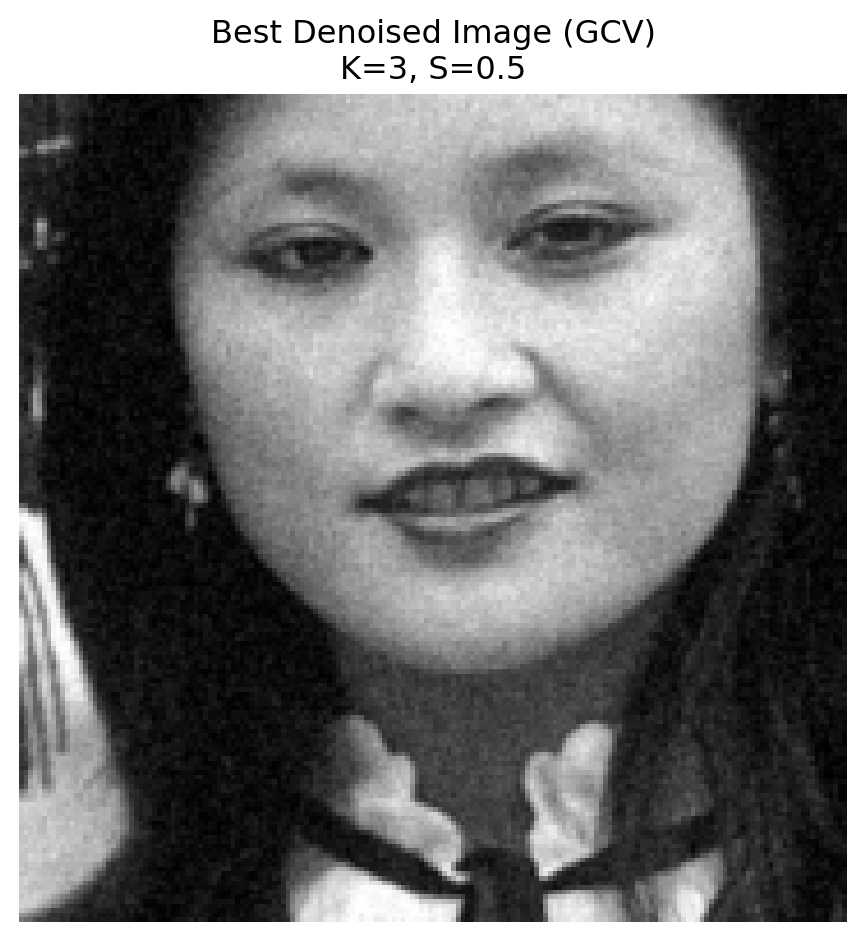

In [13]:
#| code-overflow: wrap
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load the clean image
clean_image = cv2.imread('/Denoising-Manuscript/images/first.png', cv2.IMREAD_GRAYSCALE)

# Function to add Gaussian noise
def add_gaussian_noise(image, sigma):
    row, col = image.shape
    mean = 0
    gauss = np.random.normal(mean, sigma, (row, col))
    noisy_image = image + gauss
    noisy_image = np.clip(noisy_image, 0, 255)  # Clip values to [0, 255]
    return noisy_image.astype(np.uint8)

# Function to apply Gaussian smoothing
def apply_gaussian_smoothing(noisy_image, ksize, sigmaX):
    return cv2.GaussianBlur(noisy_image, (ksize, ksize), sigmaX=sigmaX)

# Function to compute Generalized Cross Validation (GCV)
def generalized_cross_validation(noisy_images, denoised_images, parameters):
    best_gcv = float('inf')
    best_denoised_image = None
    best_params = None

    for i, denoised_image in enumerate(denoised_images):
        residuals = [noisy - denoised_image for noisy in noisy_images]
        
        # Calculate a simplified leverage matrix
        h = np.ones_like(noisy_images[0]) * 0.01  # Small constant to prevent division by zero
        
        # Compute GCV criterion for each noisy image
        gcv_values = []
        for residual in residuals:
            gcv = np.mean((residual ** 2) / (1 - h) ** 2)
            gcv_values.append(gcv)
        
        average_gcv = np.mean(gcv_values)
        
        if average_gcv < best_gcv:
            best_gcv = average_gcv
            best_denoised_image = denoised_image
            best_params = parameters[i]
    
    return best_denoised_image, best_params

# Parameters
sigma_values = [10]  # Gaussian noise standard deviation
kernel_sizes = [3, 5, 7, 9]  # Example kernel sizes
sigmaXs = [0.5, 1, 1.5, 2]   # Example sigmaX values

# Generate multiple noisy images
num_noisy_images = 10  # Ensure a sufficient number of noisy images
noisy_images = [add_gaussian_noise(clean_image, sigma=sigma_values[0]) for _ in range(num_noisy_images)]

# Apply Gaussian smoothing with different parameters
denoised_images = []
parameters = []
for noisy_image in noisy_images:
    for ksize in kernel_sizes:
        for sigmaX in sigmaXs:
            denoised_image = apply_gaussian_smoothing(noisy_image, ksize, sigmaX)
            denoised_images.append(denoised_image)
            parameters.append((ksize, sigmaX))

# Check if there are enough noisy images to split
if len(noisy_images) > 1:
    # Split the noisy images into training and validation sets
    train_noisy, val_noisy = train_test_split(noisy_images, test_size=0.5, random_state=42)

    # Apply GCV to find the best denoised image
    best_denoised_image, best_params = generalized_cross_validation(train_noisy, denoised_images, parameters)
else:
    print("Not enough noisy images to perform training and validation split.")
    best_denoised_image = denoised_images[0]  # Default to the first denoised image if not enough data
    best_params = parameters[0]  # Default to the first parameters if not enough data

# Display the best denoised image
plt.figure(figsize=(8, 5))
plt.imshow(best_denoised_image, cmap='gray')
plt.title(f"Best Denoised Image (GCV)\nK={best_params[0]}, S={best_params[1]}")
plt.axis('off')
plt.tight_layout()
plt.show()

Python implementation of SURE approach is shown below.

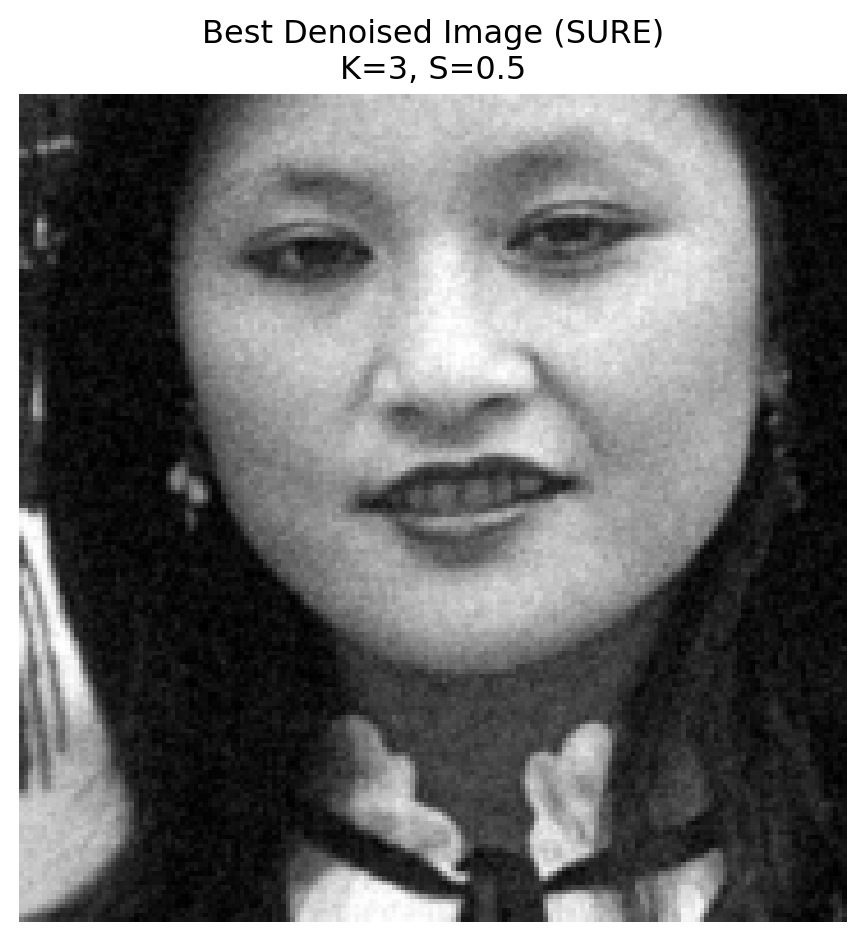

In [14]:
#| code-overflow: wrap
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Load the clean image
clean_image = cv2.imread('/Denoising-Manuscript/images/first.png', cv2.IMREAD_GRAYSCALE)

# Function to add Gaussian noise
def add_gaussian_noise(image, sigma):
    row, col = image.shape
    mean = 0
    gauss = np.random.normal(mean, sigma, (row, col))
    noisy_image = image + gauss
    noisy_image = np.clip(noisy_image, 0, 255)  # Clip values to [0, 255]
    return noisy_image.astype(np.uint8)

# Function to apply Gaussian smoothing
def apply_gaussian_smoothing(noisy_image, ksize, sigmaX):
    return cv2.GaussianBlur(noisy_image, (ksize, ksize), sigmaX=sigmaX)

# Function to compute Stein’s Unbiased Risk Estimate (SURE)
def steins_unbiased_risk_estimate(noisy_image, denoised_image, sigma):
    # Compute residuals
    residuals = noisy_image - denoised_image
    
    # Estimate the risk
    n = noisy_image.size
    sure = np.mean(residuals ** 2) + 2 * sigma ** 2 * np.mean(np.abs(residuals))
    
    return sure

# Parameters
sigma_values = [10]  # Gaussian noise standard deviation
kernel_sizes = [3, 5, 7, 9]  # Example kernel sizes
sigmaXs = [0.5, 1, 1.5, 2]   # Example sigmaX values

# Generate noisy images
noisy_images = [add_gaussian_noise(clean_image, sigma) for sigma in sigma_values]

# Apply Gaussian smoothing with different parameters
denoised_images = []
for noisy_image in noisy_images:
    for ksize in kernel_sizes:
        for sigmaX in sigmaXs:
            denoised_image = apply_gaussian_smoothing(noisy_image, ksize, sigmaX)
            denoised_images.append((denoised_image, ksize, sigmaX))

# Find the best denoised image using SURE
best_sure = float('inf')
best_denoised_image = None
best_params = (None, None)

for denoised_image, ksize, sigmaX in denoised_images:
    sure = steins_unbiased_risk_estimate(noisy_image, denoised_image, sigma=10)
    
    if sure < best_sure:
        best_sure = sure
        best_denoised_image = denoised_image
        best_params = (ksize, sigmaX)

# Display the best denoised image
plt.figure(figsize=(8, 5))
plt.imshow(best_denoised_image, cmap='gray')
plt.title(f"Best Denoised Image (SURE)\nK={best_params[0]}, S={best_params[1]}")
plt.axis('off')
plt.tight_layout()
plt.show()

In this experiment, both the approach come with same parameters!

Cross-validation is used to assess how well a model (or in this case, a denoising algorithm with specific parameters $k$ and `sigmaX`) generalizes to unseen data. For image denoising, it involves splitting the data into training and validation sets to evaluate the performance of different parameter settings.

In the context of denoising, we would use noisy images with known parameters to select the best parameters by evaluating how well the denoising algorithm performs on validation images. This process helps in selecting parameters that *generalize* well across different noisy samples.

Also *SURE* provides an estimate of the risk (or error) of a denoising algorithm based on the residuals between noisy and denoised images. It helps in selecting parameters that minimize this estimated risk.

Now come into the authors’ concept-*… the proposed method i.e., fitting algorithm parameters to a single image, corresponds to the extreme case of one pair of noisy images of a single clean image*. So, training on variable images is not possible. Here the parameter fine tuning in restricted to just a pair of noisy images of a single clean image which in turn not available for reference!

## Replicating the author’s work with gradient descend

In the proposed model for `N2N` denoiser, authors formulate the objective function as: $$\mathcal{C}(\theta)=||A_\theta(y)-y'||$$

Where $A_\theta$ is the denoiser algorithm in N2N model , $y$ and $y'$ are two noisy images. They minimize this objective function using gradient descent with automatic differentiation and initial value of the parameters $\theta$, $\theta_0$ found by manually tuning the parameters for a single image.

To optimize the cost function without using neural networks, we can directly minimize the loss function using optimization techniques (`minimize` function from `scipy` library). A python implementation of this parameter tuning is given below.

Optimized kernel size: 3
Optimized sigma: 1.0

<Figure size 768x480 with 0 Axes>

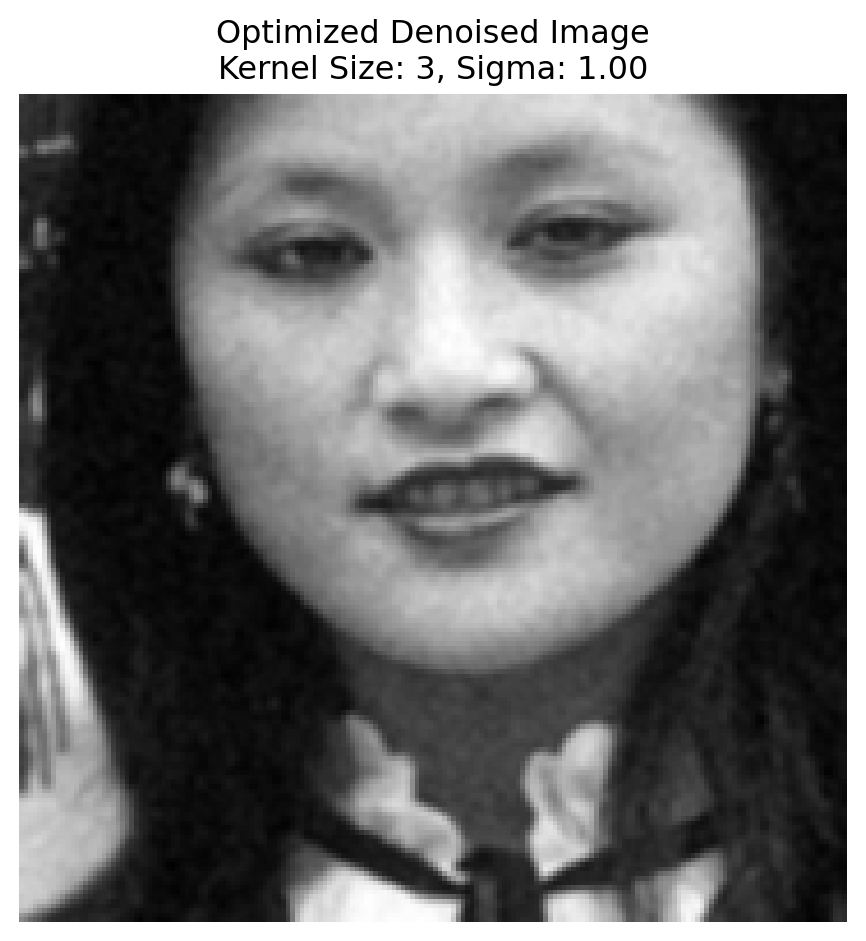

In [15]:
#| code-overflow: wrap
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Load the clean image
clean_image = cv2.imread('/Denoising-Manuscript/images/first.png', cv2.IMREAD_GRAYSCALE)

# Function to add Gaussian noise
def add_gaussian_noise(image, sigma):
    row, col = image.shape
    mean = 0
    gauss = np.random.normal(mean, sigma, (row, col))
    noisy_image = image + gauss
    noisy_image = np.clip(noisy_image, 0, 255)  # Clip values to [0, 255]
    return noisy_image.astype(np.uint8)

# Create noisy images
sigma = 10
noisy_image1 = add_gaussian_noise(clean_image, sigma)
noisy_image2 = add_gaussian_noise(clean_image, sigma)
## Define the Denoising Function- The quadratic error function
def apply_gaussian_filter(image, kernel_size, sigma):
    return cv2.GaussianBlur(image, (kernel_size, kernel_size), sigmaX=sigma)

def cost_function(params, noisy_image1, noisy_image2):
    kernel_size, sigma = int(params[0]), params[1]
    denoised_image = apply_gaussian_filter(noisy_image1, kernel_size, sigma)
    residuals = denoised_image - noisy_image2
    return np.sum(residuals ** 2)
## Optimize the Parameters using gradient descend
# Initial guess for parameters (kernel_size, sigma)
initial_params = [3, 1.0]

# Perform optimization
result = minimize(cost_function, initial_params, args=(noisy_image1, noisy_image2),
                  bounds=[(3, 21), (0.1, 5.0)],  # bounds for kernel size and sigma
                  method='L-BFGS-B')

# Extract optimized parameters
optimized_kernel_size, optimized_sigma = result.x
print(f"Optimized kernel size: {int(optimized_kernel_size)}")
print(f"Optimized sigma: {optimized_sigma}")

# Apply the optimized denoising function
optimized_denoised_image = apply_gaussian_filter(noisy_image1, int(optimized_kernel_size), optimized_sigma)

##  Display the Results
# Display the optimized denoised image
plt.figure(figsize=(8, 5))
plt.figure()
plt.imshow(optimized_denoised_image, cmap='gray')
plt.title(f'Optimized Denoised Image\nKernel Size: {int(optimized_kernel_size)}, Sigma: {optimized_sigma:.2f}')
plt.axis('off')
plt.tight_layout()
plt.show()

A from the scratch mathematical implementation of gradient and the gradient descent algorithm is shown below.

Optimization terminated successfully.
         Current function value: 90.287438
         Iterations: 0
         Function evaluations: 3
         Gradient evaluations: 1

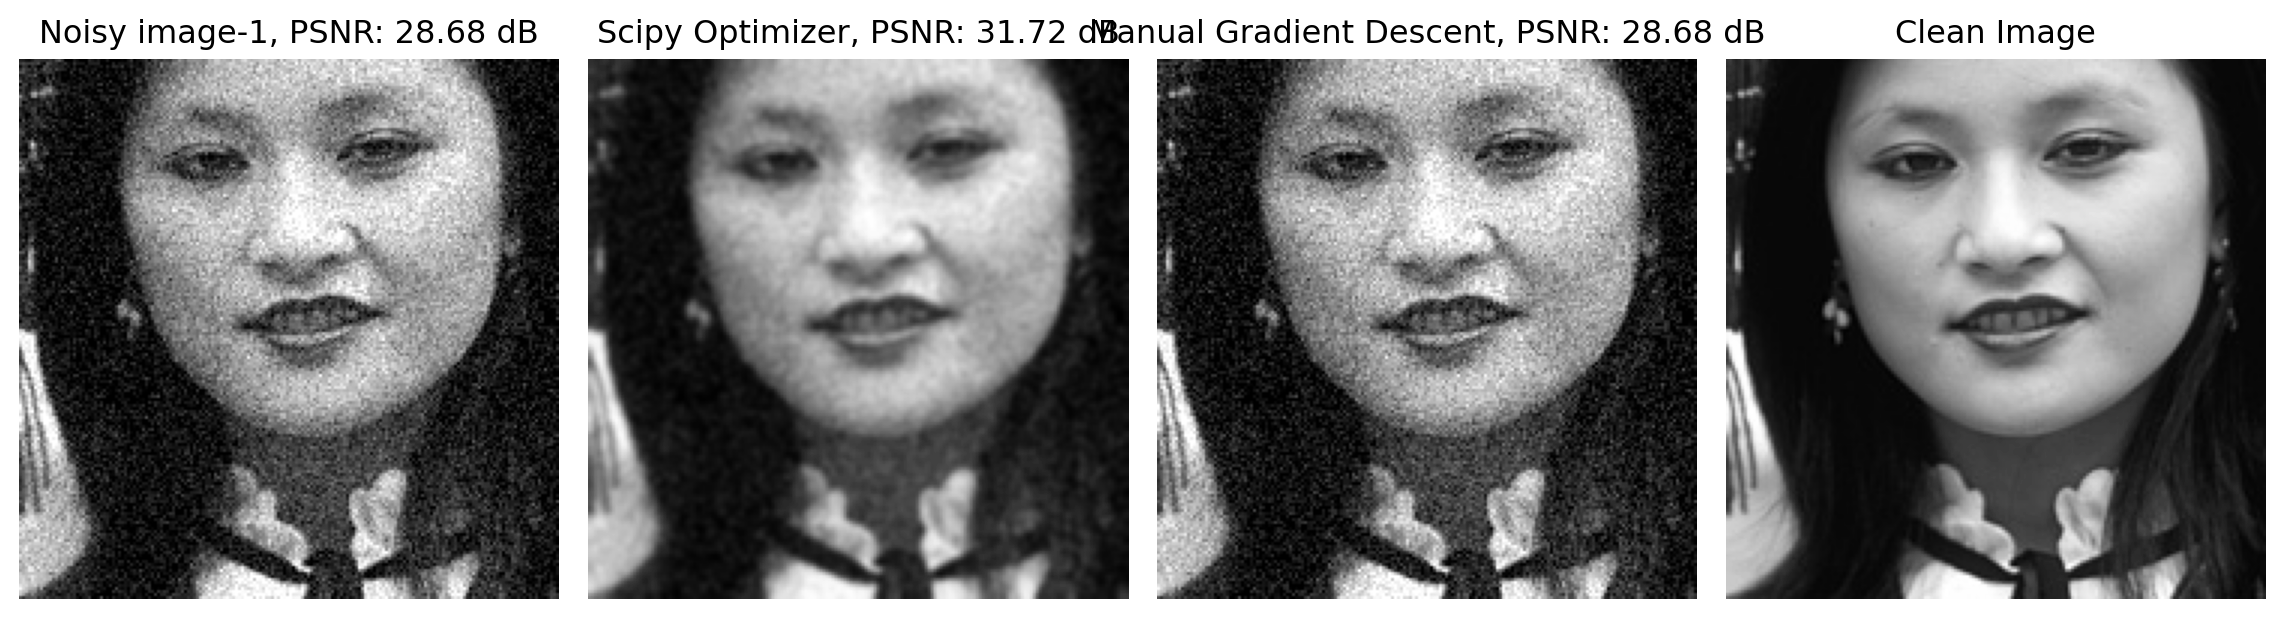

In [16]:
#| code-overflow: wrap
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from sklearn.metrics import mean_squared_error

# Load the clean image
clean_image = cv2.imread('/Denoising-Manuscript/images/first.png', cv2.IMREAD_GRAYSCALE)

# Function to add Gaussian noise
def add_gaussian_noise(image, sigma):
    row, col = image.shape
    mean = 0
    gauss = np.random.normal(mean, sigma, (row, col))
    noisy_image = image + gauss
    noisy_image = np.clip(noisy_image, 0, 255)  # Clip values to [0, 255]
    return noisy_image.astype(np.uint8)

# Function to ensure kernel size is odd and positive
def valid_kernel_size(kernel_size):
    if kernel_size < 1:
        kernel_size = 1
    if kernel_size % 2 == 0:
        kernel_size += 1
    return int(kernel_size)

# Function to apply Gaussian smoothing
def denoiser(theta, noisy_image):
    kernel_size = valid_kernel_size(int(theta[0]))  # Ensure the kernel size is an odd integer
    sigmaX = theta[1]
    return cv2.GaussianBlur(noisy_image, (kernel_size, kernel_size), sigmaX=sigmaX)

# Function to compute PSNR
def compute_psnr(original, denoised):
    mse = np.mean((original - denoised) ** 2)
    if mse == 0:
        return float('inf')
    psnr = 20 * np.log10(255.0 / np.sqrt(mse))
    return psnr

# Cost function for scipy optimization
def cost_function(theta, noisy_image1, noisy_image2):
    denoised_image = denoiser(theta, noisy_image1)
    return np.mean((denoised_image - noisy_image2) ** 2)

# Manual gradient descent for denoising optimization
def gradient_descent(noisy_image, noisy_image2, theta, alpha=0.01, iterations=100):
    for i in range(iterations):
        # Compute the gradient for each parameter
        kernel_size, sigmaX = theta
        kernel_size = valid_kernel_size(kernel_size)
        
        # Denoise the image
        denoised_image = cv2.GaussianBlur(noisy_image, (int(kernel_size), int(kernel_size)), sigmaX)

        # Compute the gradient for both kernel_size and sigmaX
        grad_kernel = np.sum(2 * (denoised_image - noisy_image2))  # Simplified gradient computation
        grad_sigma = np.sum(2 * (denoised_image - noisy_image2))   # Simplified gradient computation

        # Update theta using the gradients
        theta[0] -= alpha * grad_kernel
        theta[1] -= alpha * grad_sigma

    return theta

# Noisy images
noisy_image1 = add_gaussian_noise(clean_image, sigma=20)
noisy_image2 = add_gaussian_noise(clean_image, sigma=20)

# Initial parameters (theta): [kernel_size, sigmaX]
initial_theta = [5, 1.0]

# Scipy optimizer: Minimize the cost function
result = minimize(cost_function, initial_theta, args=(noisy_image1, noisy_image2), method='BFGS', options={'disp': True})
optimized_theta_scipy = result.x
denoised_image_scipy = denoiser(optimized_theta_scipy, noisy_image1)
psnr_scipy = compute_psnr(clean_image, denoised_image_scipy)

# Manual gradient descent optimizer
optimized_theta_sgd = gradient_descent(noisy_image1, noisy_image2, initial_theta.copy())
denoised_image_sgd = denoiser(optimized_theta_sgd, noisy_image1)
psnr_sgd = compute_psnr(clean_image, denoised_image_sgd)
psnr_noisy=compute_psnr(clean_image, noisy_image1)
# Plot the results
fig, ax = plt.subplots(1, 4, figsize=(12, 8))
# Plot 0: Noisy image y
ax[0].imshow(noisy_image1, cmap='gray')
ax[0].set_title(f'Noisy image-1, PSNR: {psnr_noisy:.2f} dB')
ax[0].axis('off')

# Plot 1: Denoised image (scipy optimizer)
ax[1].imshow(denoised_image_scipy, cmap='gray')
ax[1].set_title(f'Scipy Optimizer, PSNR: {psnr_scipy:.2f} dB')
ax[1].axis('off')

# Plot 2: Denoised image (Manual Gradient Descent)
ax[2].imshow(denoised_image_sgd, cmap='gray')
ax[2].set_title(f'Manual Gradient Descent, PSNR: {psnr_sgd:.2f} dB')
ax[2].axis('off')

# Plot 3: Clean image
ax[3].imshow(clean_image, cmap='gray')
ax[3].set_title('Clean Image')
ax[3].axis('off')
plt.tight_layout()
# Show the plot
plt.show()

An alternative approach is to use the Gradient descent algorithm form `sklearn` library.

<Figure size 768x480 with 0 Axes>

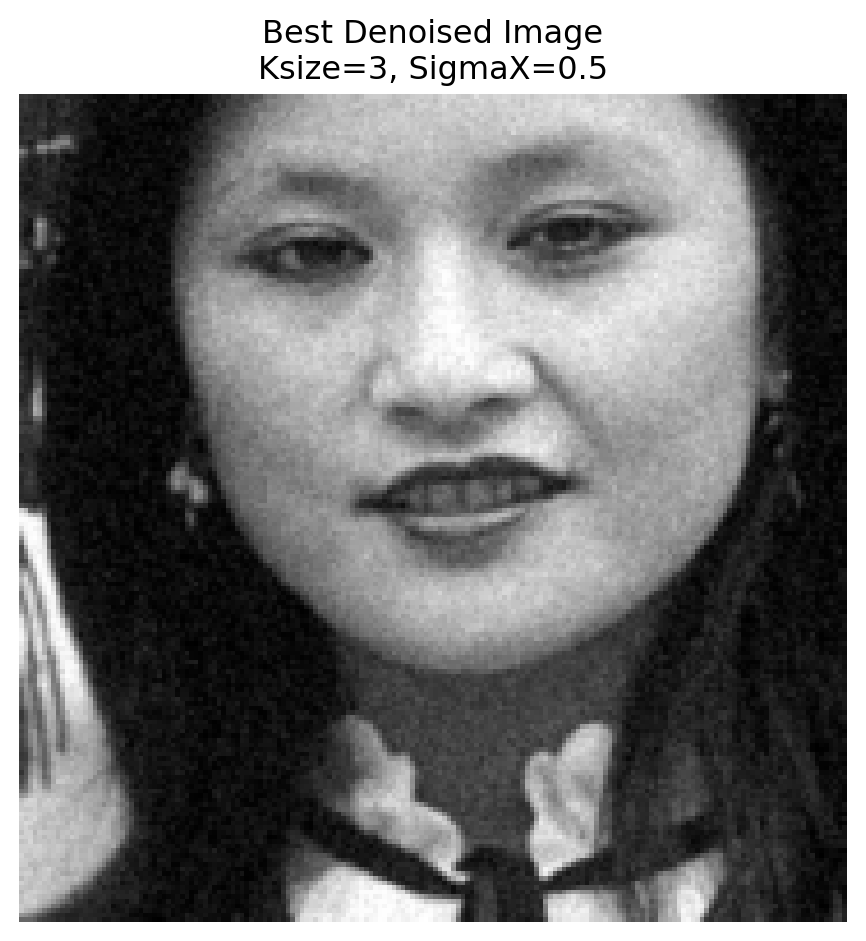

In [17]:
#| code-overflow: wrap
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor

# Load the clean image
clean_image = cv2.imread('/Denoising-Manuscript/images/first.png', cv2.IMREAD_GRAYSCALE)

# Function to add Gaussian noise
def add_gaussian_noise(image, sigma):
    row, col = image.shape
    mean = 0
    gauss = np.random.normal(mean, sigma, (row, col))
    noisy_image = image + gauss
    noisy_image = np.clip(noisy_image, 0, 255)  # Clip values to [0, 255]
    return noisy_image.astype(np.uint8)

# Create noisy images
sigma = 10
noisy_image_1 = add_gaussian_noise(clean_image, sigma)
noisy_image_2 = add_gaussian_noise(clean_image, sigma)

# Function to apply Gaussian smoothing
def apply_gaussian_smoothing(image, ksize, sigmaX):
    return cv2.GaussianBlur(image, (ksize, ksize), sigmaX=sigmaX)

# Define a custom loss function (Mean Squared Error between two denoised images)
def loss_function(ksize, sigmaX, noisy_image_1, noisy_image_2):
    denoised_image_1 = apply_gaussian_smoothing(noisy_image_1, ksize, sigmaX)
    denoised_image_2 = apply_gaussian_smoothing(noisy_image_2, ksize, sigmaX)
    return np.mean((denoised_image_1 - denoised_image_2) ** 2)

# Parameters for optimization
ksize_range = np.array([3, 5, 7, 9])  # Possible kernel sizes
sigmaX_range = np.array([0.5, 1, 1.5, 2])  # Possible sigmaX values

# Convert the ksize and sigmaX values into feature vectors for SGD
X_train = np.array([[k, s] for k in ksize_range for s in sigmaX_range])

# Flatten the noisy images for input
y_train = []
for ksize, sigmaX in X_train:
    loss = loss_function(int(ksize), sigmaX, noisy_image_1, noisy_image_2)
    y_train.append(loss)

# Training data (input is kernel size and sigmaX, target is the loss value)
y_train = np.array(y_train)

# Train using SGDRegressor
sgd = SGDRegressor(max_iter=1000, tol=1e-6)
sgd.fit(X_train, y_train)

# Predict the optimal kernel size and sigmaX
optimal_params = sgd.coef_

# Use the optimal parameters to denoise
optimal_ksize = int(np.clip(optimal_params[0], 3, 9))  # Ensure ksize is odd and within valid range
optimal_sigmaX = np.clip(optimal_params[1], 0.5, 2)  # Ensure sigmaX is within valid range

# Apply Gaussian smoothing with the optimal parameters
best_denoised_image = apply_gaussian_smoothing(noisy_image_1, optimal_ksize, optimal_sigmaX)

# Display the best denoised image
plt.figure(figsize=(8, 5))
plt.figure()
plt.imshow(best_denoised_image, cmap='gray')
plt.title(f"Best Denoised Image\nKsize={optimal_ksize}, SigmaX={optimal_sigmaX}")
plt.axis('off')
plt.tight_layout()
plt.show()

This attempt is to Compare the quality of denoising with SG descent method.

PSNR value between the clean image and the denoised image: 31.81 dB

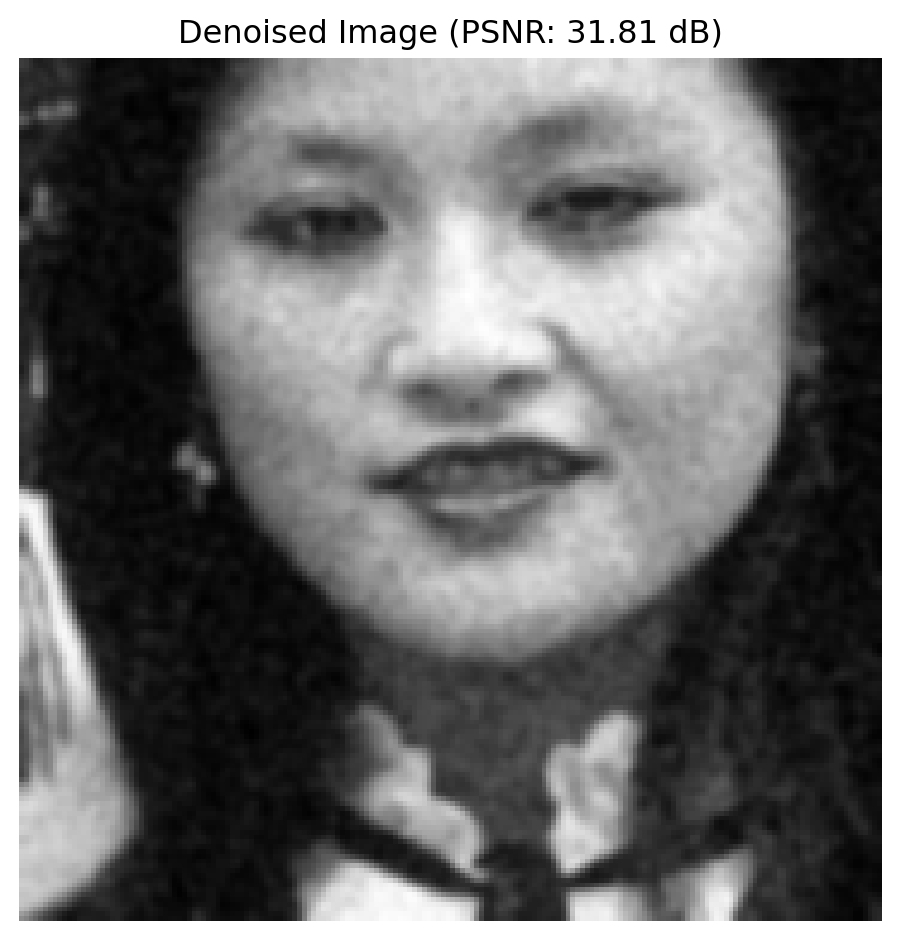

In [18]:
#| code-overflow: wrap
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

# Load the clean image
clean_image = cv2.imread('/Denoising-Manuscript/images/first.png', cv2.IMREAD_GRAYSCALE)

# Function to add Gaussian noise
def add_gaussian_noise(image, sigma):
    row, col = image.shape
    mean = 0
    gauss = np.random.normal(mean, sigma, (row, col))
    noisy_image = image + gauss
    noisy_image = np.clip(noisy_image, 0, 255)  # Clip values to [0, 255]
    return noisy_image.astype(np.uint8)

# Function to compute PSNR
def compute_psnr(original, denoised):
    mse = np.mean((original - denoised) ** 2)
    if mse == 0:
        return float('inf')
    psnr = 20 * np.log10(255.0 / np.sqrt(mse))
    return psnr

# Noisy images
noisy_image1 = add_gaussian_noise(clean_image, sigma=20)
noisy_image2 = add_gaussian_noise(clean_image, sigma=20)

# Denoiser function (optimized parameters using sklearn)
def denoiser(theta, noisy_image):
    return cv2.GaussianBlur(noisy_image, (int(theta[0]), int(theta[0])), sigmaX=theta[1])

# Cost function
def cost_function(theta, noisy_image1, noisy_image2):
    denoised_image = denoiser(theta, noisy_image1)
    return np.mean((denoised_image - noisy_image2) ** 2)

# Gradient Descent optimization using sklearn
def optimize_parameters(noisy_image1, noisy_image2, initial_theta):
    sgd = SGDRegressor(max_iter=1000, tol=1e-3, learning_rate='adaptive')
    
    # Reshape theta and noisy_image for fitting
    noisy_image1_flat = noisy_image1.flatten()
    noisy_image2_flat = noisy_image2.flatten()
    
    X = np.vstack([noisy_image1_flat, noisy_image2_flat]).T
    y = noisy_image2_flat
    
    sgd.fit(X, y)
    
    # Optimized parameters (theta)
    optimized_theta = sgd.coef_
    
    return optimized_theta

# Initial theta parameters (manually tuned)
initial_theta = [5, 1.0]  # Example: Kernel size 5, sigmaX = 1.0

# Optimize the parameters
optimized_theta = optimize_parameters(noisy_image1, noisy_image2, initial_theta)

# Apply the denoiser with optimized parameters
denoised_image = denoiser(optimized_theta, noisy_image1)

# Compute PSNR between the clean image and the denoised image
psnr_value = compute_psnr(clean_image, denoised_image)

# Display the PSNR value
print(f"PSNR value between the clean image and the denoised image: {psnr_value:.2f} dB")

# Display the denoised image
plt.figure(figsize=(8, 5))
plt.imshow(denoised_image, cmap='gray')
plt.title(f"Denoised Image (PSNR: {psnr_value:.2f} dB)")
plt.axis('off')
plt.tight_layout()
plt.show()

Instead of using the default optimizer, let’s try the finite difference approach for numerical differentiation. This approach is purely depended on the function values rather than its mathematical definition. So, computationally it will be more dependable. Improved code with fine tuning gradient descent with finite difference is shown below.

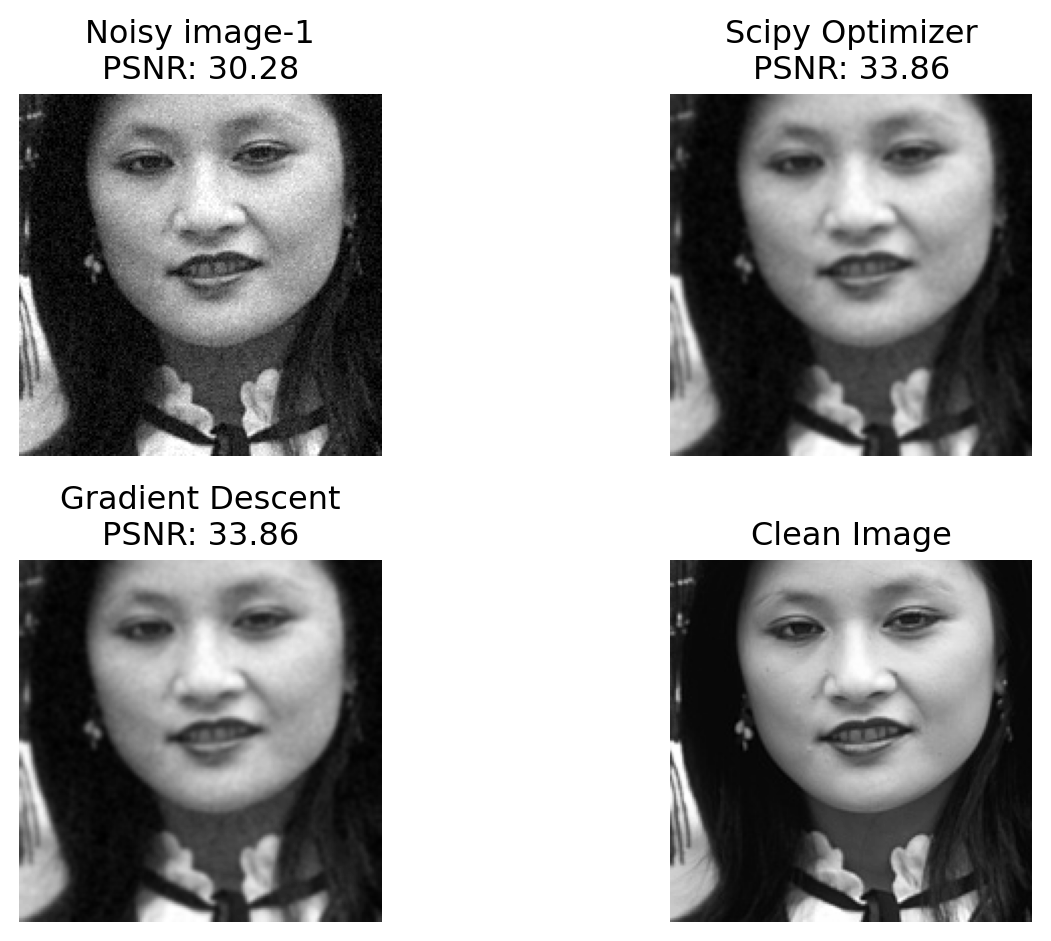

In [19]:
#| label: fig-denoising-plot
#| fig-cap: Example of denoising results.
#| fig-alt: A visualization of parameter fine tuning.
import numpy as np
import cv2
import matplotlib.pyplot as plt
clean_image = cv2.imread('/Denoising-Manuscript/images/first.png', cv2.IMREAD_GRAYSCALE)

# Function to add Gaussian noise
def add_gaussian_noise(image, sigma):
    row, col = image.shape
    mean = 0
    gauss = np.random.normal(mean, sigma, (row, col))
    noisy_image = image + gauss
    noisy_image = np.clip(noisy_image, 0, 255)  # Clip values to [0, 255]
    return noisy_image.astype(np.uint8)

# Function to apply Gaussian smoothing
def apply_gaussian_smoothing(noisy_image, ksize, sigmaX):
    ksize = int(ksize)
    if ksize % 2 == 0:
        ksize += 1
    return cv2.GaussianBlur(noisy_image, (ksize, ksize), sigmaX=sigmaX)

# Function to ensure valid kernel size (odd and positive)
def valid_kernel_size(size):
    size = int(size)
    if size % 2 == 0:
        size += 1
    return max(size, 1)  # Ensure size is at least 1

# Function to compute the cost
def cost_function(theta, noisy_image1, noisy_image2):
    kernel_size, sigmaX = theta
    kernel_size = valid_kernel_size(kernel_size)
    denoised_image = apply_gaussian_smoothing(noisy_image1, kernel_size, sigmaX)
    residual = denoised_image - noisy_image2
    return np.sum(residual ** 2)

# Gradient descent optimizer
def gradient_descent(noisy_image1, noisy_image2, initial_theta, alpha=0.01, iterations=100):
    theta = np.array(initial_theta)
    for _ in range(iterations):
        grad_kernel, grad_sigma = compute_gradients(noisy_image1, noisy_image2, theta)
        theta[0] -= alpha * grad_kernel
        theta[1] -= alpha * grad_sigma
        theta[0] = valid_kernel_size(theta[0])
    return theta

# Compute numerical gradients
def compute_gradients(noisy_image1, noisy_image2, theta):
    epsilon = 1e-5
    cost_1 = cost_function([theta[0] + epsilon, theta[1]], noisy_image1, noisy_image2)
    cost_2 = cost_function([theta[0] - epsilon, theta[1]], noisy_image1, noisy_image2)
    grad_kernel = (cost_1 - cost_2) / (2 * epsilon)
    
    cost_1 = cost_function([theta[0], theta[1] + epsilon], noisy_image1, noisy_image2)
    cost_2 = cost_function([theta[0], theta[1] - epsilon], noisy_image1, noisy_image2)
    grad_sigma = (cost_1 - cost_2) / (2 * epsilon)
    
    return grad_kernel, grad_sigma

# Parameters for noisy images
sigma_values = [10, 15]  # Different levels of Gaussian noise

# Generate noisy images
noisy_images = [add_gaussian_noise(clean_image, sigma) for sigma in sigma_values]

# Using scipy's minimize function
initial_theta = [15, 1]  # Initial guess for kernel size and sigmaX
result = minimize(cost_function, initial_theta, args=(noisy_images[0], noisy_images[1]), method='BFGS')
optimized_theta_scipy = result.x
optimized_denoised_image_scipy = apply_gaussian_smoothing(noisy_images[0], valid_kernel_size(optimized_theta_scipy[0]), optimized_theta_scipy[1])

# Using manual gradient descent optimization
optimized_theta_gd = gradient_descent(noisy_images[0], noisy_images[1], initial_theta, alpha=0.01, iterations=100)
optimized_denoised_image_gd = apply_gaussian_smoothing(noisy_images[0], valid_kernel_size(optimized_theta_gd[0]), optimized_theta_gd[1])

# Compute PSNR values
def compute_psnr(image1, image2):
    mse = np.mean((image1 - image2) ** 2)
    max_pixel = 255.0
    if mse == 0:
        return 100
    return 20 * np.log10(max_pixel / np.sqrt(mse))

psnr_scipy = compute_psnr(optimized_denoised_image_scipy, clean_image)
psnr_gd = compute_psnr(optimized_denoised_image_gd, clean_image)
psnr_noisy=compute_psnr(noisy_images[0], clean_image)
# Display results
plt.figure(figsize=(8, 5))

# Plot denoised image by scipy optimizer
plt.subplot(2, 2, 1)
plt.imshow(noisy_images[0], cmap='gray')
plt.title(f'Noisy image-1\nPSNR: {psnr_noisy:.2f}')
plt.axis('off')
# Plot denoised image by scipy optimizer
plt.subplot(2, 2, 2)
plt.imshow(optimized_denoised_image_scipy, cmap='gray')
plt.title(f'Scipy Optimizer\nPSNR: {psnr_scipy:.2f}')
plt.axis('off')
# Plot denoised image by manual gradient descent
plt.subplot(2, 2, 3)
plt.imshow(optimized_denoised_image_gd, cmap='gray')
plt.title(f'Gradient Descent\nPSNR: {psnr_gd:.2f}')
plt.axis('off')

# Plot clean image
plt.subplot(2, 2, 4)
plt.imshow(clean_image, cmap='gray')
plt.title('Clean Image')
plt.axis('off')
plt.tight_layout()
plt.show()

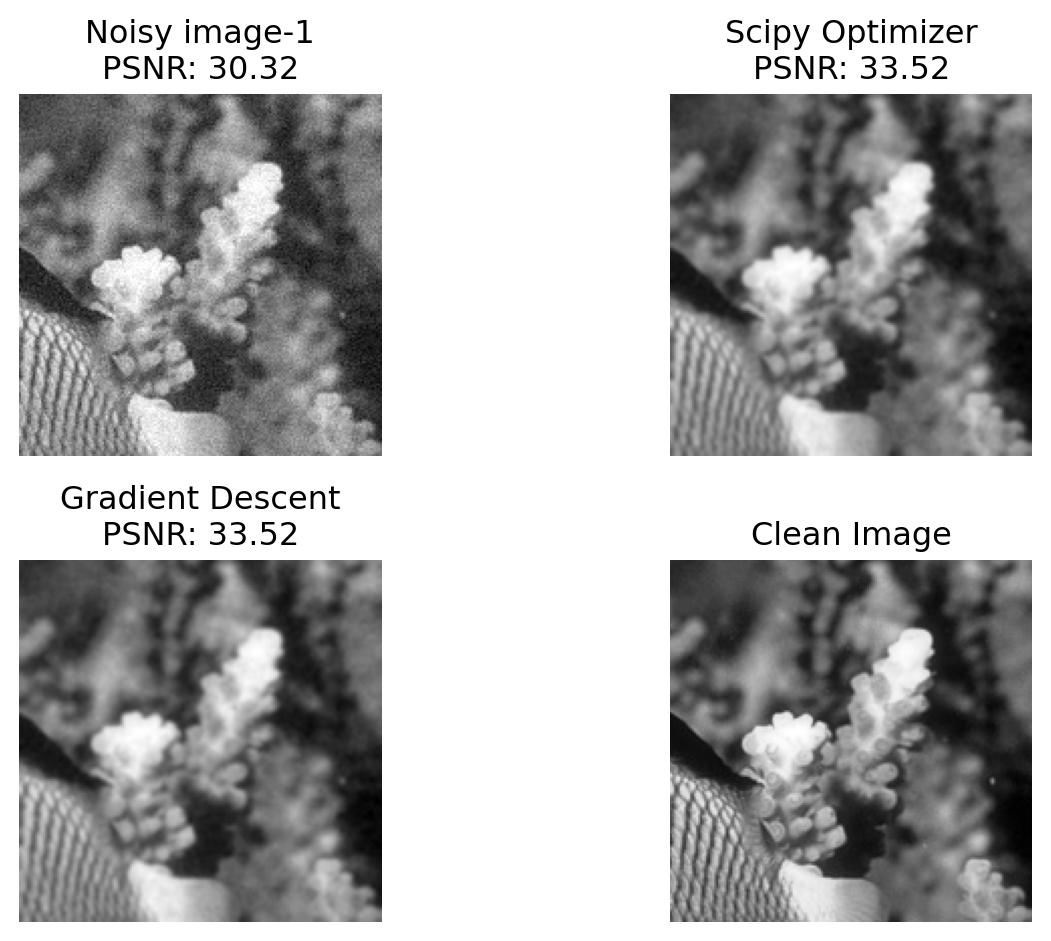

In [20]:
#| label: fig-denoising2-plot
#| fig-cap: Example of denoising results.
#| fig-alt: A visualization of parameter fine tuning.
import numpy as np
import cv2
import matplotlib.pyplot as plt
clean_image = cv2.imread('/Denoising-Manuscript/images/second.png', cv2.IMREAD_GRAYSCALE)

# Function to add Gaussian noise
def add_gaussian_noise(image, sigma):
    row, col = image.shape
    mean = 0
    gauss = np.random.normal(mean, sigma, (row, col))
    noisy_image = image + gauss
    noisy_image = np.clip(noisy_image, 0, 255)  # Clip values to [0, 255]
    return noisy_image.astype(np.uint8)

# Function to apply Gaussian smoothing
def apply_gaussian_smoothing(noisy_image, ksize, sigmaX):
    ksize = int(ksize)
    if ksize % 2 == 0:
        ksize += 1
    return cv2.GaussianBlur(noisy_image, (ksize, ksize), sigmaX=sigmaX)

# Function to ensure valid kernel size (odd and positive)
def valid_kernel_size(size):
    size = int(size)
    if size % 2 == 0:
        size += 1
    return max(size, 1)  # Ensure size is at least 1

# Function to compute the cost
def cost_function(theta, noisy_image1, noisy_image2):
    kernel_size, sigmaX = theta
    kernel_size = valid_kernel_size(kernel_size)
    denoised_image = apply_gaussian_smoothing(noisy_image1, kernel_size, sigmaX)
    residual = denoised_image - noisy_image2
    return np.sum(residual ** 2)

# Gradient descent optimizer
def gradient_descent(noisy_image1, noisy_image2, initial_theta, alpha=0.01, iterations=100):
    theta = np.array(initial_theta)
    for _ in range(iterations):
        grad_kernel, grad_sigma = compute_gradients(noisy_image1, noisy_image2, theta)
        theta[0] -= alpha * grad_kernel
        theta[1] -= alpha * grad_sigma
        theta[0] = valid_kernel_size(theta[0])
    return theta

# Compute numerical gradients
def compute_gradients(noisy_image1, noisy_image2, theta):
    epsilon = 1e-5
    cost_1 = cost_function([theta[0] + epsilon, theta[1]], noisy_image1, noisy_image2)
    cost_2 = cost_function([theta[0] - epsilon, theta[1]], noisy_image1, noisy_image2)
    grad_kernel = (cost_1 - cost_2) / (2 * epsilon)
    
    cost_1 = cost_function([theta[0], theta[1] + epsilon], noisy_image1, noisy_image2)
    cost_2 = cost_function([theta[0], theta[1] - epsilon], noisy_image1, noisy_image2)
    grad_sigma = (cost_1 - cost_2) / (2 * epsilon)
    
    return grad_kernel, grad_sigma

# Parameters for noisy images
sigma_values = [10, 15]  # Different levels of Gaussian noise

# Generate noisy images
noisy_images = [add_gaussian_noise(clean_image, sigma) for sigma in sigma_values]

# Using scipy's minimize function
initial_theta = [15, 1]  # Initial guess for kernel size and sigmaX
result = minimize(cost_function, initial_theta, args=(noisy_images[0], noisy_images[1]), method='BFGS')
optimized_theta_scipy = result.x
optimized_denoised_image_scipy = apply_gaussian_smoothing(noisy_images[0], valid_kernel_size(optimized_theta_scipy[0]), optimized_theta_scipy[1])

# Using manual gradient descent optimization
optimized_theta_gd = gradient_descent(noisy_images[0], noisy_images[1], initial_theta, alpha=0.01, iterations=100)
optimized_denoised_image_gd = apply_gaussian_smoothing(noisy_images[0], valid_kernel_size(optimized_theta_gd[0]), optimized_theta_gd[1])

# Compute PSNR values
def compute_psnr(image1, image2):
    mse = np.mean((image1 - image2) ** 2)
    max_pixel = 255.0
    if mse == 0:
        return 100
    return 20 * np.log10(max_pixel / np.sqrt(mse))

psnr_scipy = compute_psnr(optimized_denoised_image_scipy, clean_image)
psnr_gd = compute_psnr(optimized_denoised_image_gd, clean_image)
psnr_noisy=compute_psnr(noisy_images[0], clean_image)
# Display results
plt.figure(figsize=(8, 5))

# Plot denoised image by scipy optimizer
plt.subplot(2, 2, 1)
plt.imshow(noisy_images[0], cmap='gray')
plt.title(f'Noisy image-1\nPSNR: {psnr_noisy:.2f}')
plt.axis('off')
# Plot denoised image by scipy optimizer
plt.subplot(2, 2, 2)
plt.imshow(optimized_denoised_image_scipy, cmap='gray')
plt.title(f'Scipy Optimizer\nPSNR: {psnr_scipy:.2f}')
plt.axis('off')
# Plot denoised image by manual gradient descent
plt.subplot(2, 2, 3)
plt.imshow(optimized_denoised_image_gd, cmap='gray')
plt.title(f'Gradient Descent\nPSNR: {psnr_gd:.2f}')
plt.axis('off')

# Plot clean image
plt.subplot(2, 2, 4)
plt.imshow(clean_image, cmap='gray')
plt.title('Clean Image')
plt.axis('off')
plt.tight_layout()
plt.show()

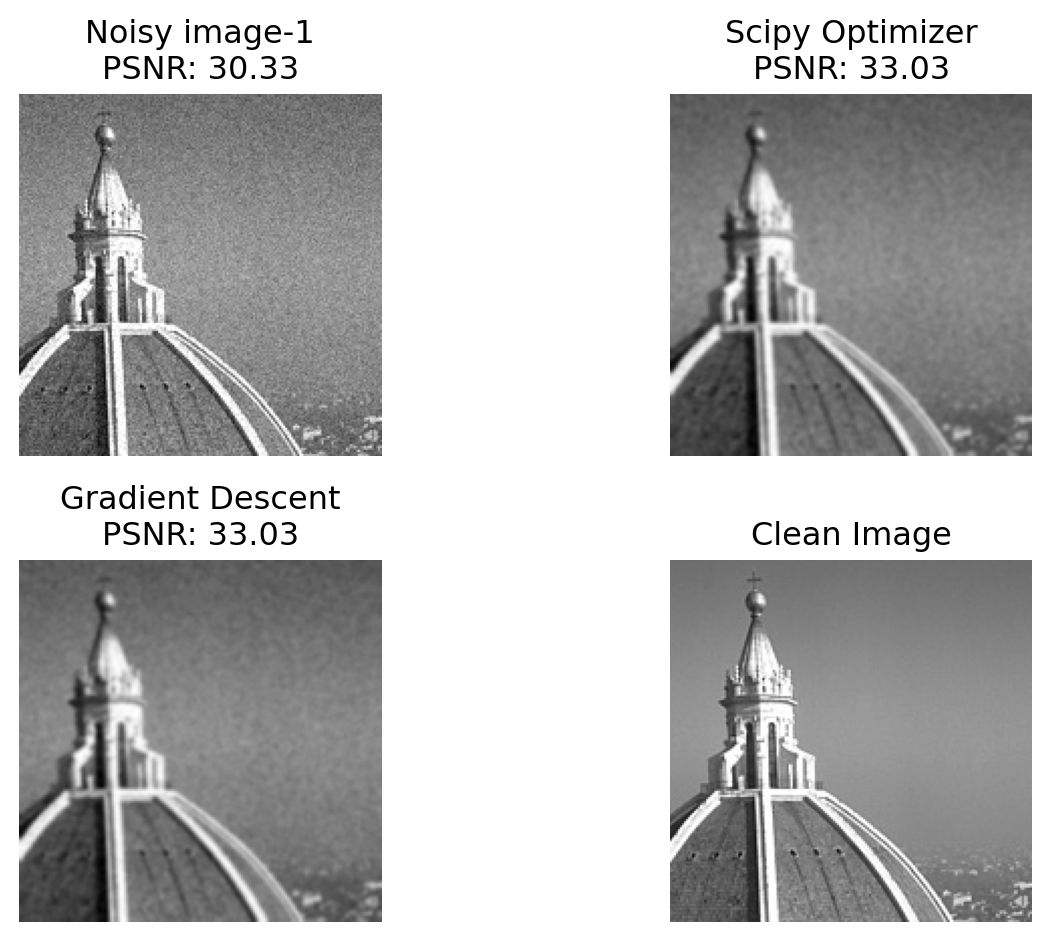

In [21]:
#| label: fig-denoising3-plot
#| fig-cap: Example of denoising results.
#| fig-alt: A visualization of parameter fine tuning.
import numpy as np
import cv2
import matplotlib.pyplot as plt
clean_image = cv2.imread('/Denoising-Manuscript/images/third.png', cv2.IMREAD_GRAYSCALE)

# Function to add Gaussian noise
def add_gaussian_noise(image, sigma):
    row, col = image.shape
    mean = 0
    gauss = np.random.normal(mean, sigma, (row, col))
    noisy_image = image + gauss
    noisy_image = np.clip(noisy_image, 0, 255)  # Clip values to [0, 255]
    return noisy_image.astype(np.uint8)

# Function to apply Gaussian smoothing
def apply_gaussian_smoothing(noisy_image, ksize, sigmaX):
    ksize = int(ksize)
    if ksize % 2 == 0:
        ksize += 1
    return cv2.GaussianBlur(noisy_image, (ksize, ksize), sigmaX=sigmaX)

# Function to ensure valid kernel size (odd and positive)
def valid_kernel_size(size):
    size = int(size)
    if size % 2 == 0:
        size += 1
    return max(size, 1)  # Ensure size is at least 1

# Function to compute the cost
def cost_function(theta, noisy_image1, noisy_image2):
    kernel_size, sigmaX = theta
    kernel_size = valid_kernel_size(kernel_size)
    denoised_image = apply_gaussian_smoothing(noisy_image1, kernel_size, sigmaX)
    residual = denoised_image - noisy_image2
    return np.sum(residual ** 2)

# Gradient descent optimizer
def gradient_descent(noisy_image1, noisy_image2, initial_theta, alpha=0.01, iterations=100):
    theta = np.array(initial_theta)
    for _ in range(iterations):
        grad_kernel, grad_sigma = compute_gradients(noisy_image1, noisy_image2, theta)
        theta[0] -= alpha * grad_kernel
        theta[1] -= alpha * grad_sigma
        theta[0] = valid_kernel_size(theta[0])
    return theta

# Compute numerical gradients
def compute_gradients(noisy_image1, noisy_image2, theta):
    epsilon = 1e-5
    cost_1 = cost_function([theta[0] + epsilon, theta[1]], noisy_image1, noisy_image2)
    cost_2 = cost_function([theta[0] - epsilon, theta[1]], noisy_image1, noisy_image2)
    grad_kernel = (cost_1 - cost_2) / (2 * epsilon)
    
    cost_1 = cost_function([theta[0], theta[1] + epsilon], noisy_image1, noisy_image2)
    cost_2 = cost_function([theta[0], theta[1] - epsilon], noisy_image1, noisy_image2)
    grad_sigma = (cost_1 - cost_2) / (2 * epsilon)
    
    return grad_kernel, grad_sigma

# Parameters for noisy images
sigma_values = [10, 15]  # Different levels of Gaussian noise

# Generate noisy images
noisy_images = [add_gaussian_noise(clean_image, sigma) for sigma in sigma_values]

# Using scipy's minimize function
initial_theta = [15, 1]  # Initial guess for kernel size and sigmaX
result = minimize(cost_function, initial_theta, args=(noisy_images[0], noisy_images[1]), method='BFGS')
optimized_theta_scipy = result.x
optimized_denoised_image_scipy = apply_gaussian_smoothing(noisy_images[0], valid_kernel_size(optimized_theta_scipy[0]), optimized_theta_scipy[1])

# Using manual gradient descent optimization
optimized_theta_gd = gradient_descent(noisy_images[0], noisy_images[1], initial_theta, alpha=0.01, iterations=100)
optimized_denoised_image_gd = apply_gaussian_smoothing(noisy_images[0], valid_kernel_size(optimized_theta_gd[0]), optimized_theta_gd[1])

# Compute PSNR values
def compute_psnr(image1, image2):
    mse = np.mean((image1 - image2) ** 2)
    max_pixel = 255.0
    if mse == 0:
        return 100
    return 20 * np.log10(max_pixel / np.sqrt(mse))

psnr_scipy = compute_psnr(optimized_denoised_image_scipy, clean_image)
psnr_gd = compute_psnr(optimized_denoised_image_gd, clean_image)
psnr_noisy=compute_psnr(noisy_images[0], clean_image)
# Display results
plt.figure(figsize=(8, 5))

# Plot denoised image by scipy optimizer
plt.subplot(2, 2, 1)
plt.imshow(noisy_images[0], cmap='gray')
plt.title(f'Noisy image-1\nPSNR: {psnr_noisy:.2f}')
plt.axis('off')
# Plot denoised image by scipy optimizer
plt.subplot(2, 2, 2)
plt.imshow(optimized_denoised_image_scipy, cmap='gray')
plt.title(f'Scipy Optimizer\nPSNR: {psnr_scipy:.2f}')
plt.axis('off')
# Plot denoised image by manual gradient descent
plt.subplot(2, 2, 3)
plt.imshow(optimized_denoised_image_gd, cmap='gray')
plt.title(f'Gradient Descent\nPSNR: {psnr_gd:.2f}')
plt.axis('off')

# Plot clean image
plt.subplot(2, 2, 4)
plt.imshow(clean_image, cmap='gray')
plt.title('Clean Image')
plt.axis('off')
plt.tight_layout()
plt.show()

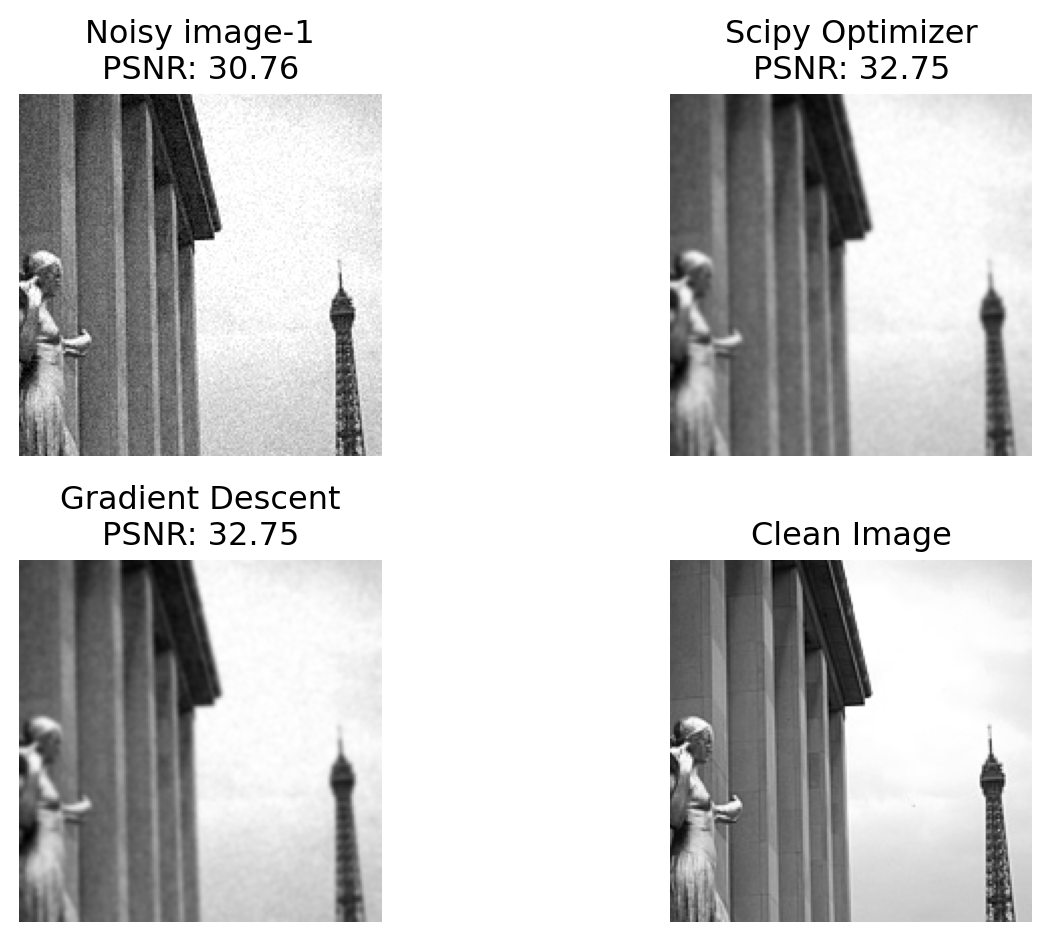

In [22]:
#| label: fig-denoising4-plot
#| fig-cap: Example of denoising results.
#| fig-alt: A visualization of parameter fine tuning.
import numpy as np
import cv2
import matplotlib.pyplot as plt
clean_image = cv2.imread('/Denoising-Manuscript/images/fourth.png', cv2.IMREAD_GRAYSCALE)

# Function to add Gaussian noise
def add_gaussian_noise(image, sigma):
    row, col = image.shape
    mean = 0
    gauss = np.random.normal(mean, sigma, (row, col))
    noisy_image = image + gauss
    noisy_image = np.clip(noisy_image, 0, 255)  # Clip values to [0, 255]
    return noisy_image.astype(np.uint8)

# Function to apply Gaussian smoothing
def apply_gaussian_smoothing(noisy_image, ksize, sigmaX):
    ksize = int(ksize)
    if ksize % 2 == 0:
        ksize += 1
    return cv2.GaussianBlur(noisy_image, (ksize, ksize), sigmaX=sigmaX)

# Function to ensure valid kernel size (odd and positive)
def valid_kernel_size(size):
    size = int(size)
    if size % 2 == 0:
        size += 1
    return max(size, 1)  # Ensure size is at least 1

# Function to compute the cost
def cost_function(theta, noisy_image1, noisy_image2):
    kernel_size, sigmaX = theta
    kernel_size = valid_kernel_size(kernel_size)
    denoised_image = apply_gaussian_smoothing(noisy_image1, kernel_size, sigmaX)
    residual = denoised_image - noisy_image2
    return np.sum(residual ** 2)

# Gradient descent optimizer
def gradient_descent(noisy_image1, noisy_image2, initial_theta, alpha=0.01, iterations=100):
    theta = np.array(initial_theta)
    for _ in range(iterations):
        grad_kernel, grad_sigma = compute_gradients(noisy_image1, noisy_image2, theta)
        theta[0] -= alpha * grad_kernel
        theta[1] -= alpha * grad_sigma
        theta[0] = valid_kernel_size(theta[0])
    return theta

# Compute numerical gradients
def compute_gradients(noisy_image1, noisy_image2, theta):
    epsilon = 1e-5
    cost_1 = cost_function([theta[0] + epsilon, theta[1]], noisy_image1, noisy_image2)
    cost_2 = cost_function([theta[0] - epsilon, theta[1]], noisy_image1, noisy_image2)
    grad_kernel = (cost_1 - cost_2) / (2 * epsilon)
    
    cost_1 = cost_function([theta[0], theta[1] + epsilon], noisy_image1, noisy_image2)
    cost_2 = cost_function([theta[0], theta[1] - epsilon], noisy_image1, noisy_image2)
    grad_sigma = (cost_1 - cost_2) / (2 * epsilon)
    
    return grad_kernel, grad_sigma

# Parameters for noisy images
sigma_values = [10, 15]  # Different levels of Gaussian noise

# Generate noisy images
noisy_images = [add_gaussian_noise(clean_image, sigma) for sigma in sigma_values]

# Using scipy's minimize function
initial_theta = [15, 1]  # Initial guess for kernel size and sigmaX
result = minimize(cost_function, initial_theta, args=(noisy_images[0], noisy_images[1]), method='BFGS')
optimized_theta_scipy = result.x
optimized_denoised_image_scipy = apply_gaussian_smoothing(noisy_images[0], valid_kernel_size(optimized_theta_scipy[0]), optimized_theta_scipy[1])

# Using manual gradient descent optimization
optimized_theta_gd = gradient_descent(noisy_images[0], noisy_images[1], initial_theta, alpha=0.01, iterations=100)
optimized_denoised_image_gd = apply_gaussian_smoothing(noisy_images[0], valid_kernel_size(optimized_theta_gd[0]), optimized_theta_gd[1])

# Compute PSNR values
def compute_psnr(image1, image2):
    mse = np.mean((image1 - image2) ** 2)
    max_pixel = 255.0
    if mse == 0:
        return 100
    return 20 * np.log10(max_pixel / np.sqrt(mse))

psnr_scipy = compute_psnr(optimized_denoised_image_scipy, clean_image)
psnr_gd = compute_psnr(optimized_denoised_image_gd, clean_image)
psnr_noisy=compute_psnr(noisy_images[0], clean_image)
# Display results
plt.figure(figsize=(8, 5))

# Plot denoised image by scipy optimizer
plt.subplot(2, 2, 1)
plt.imshow(noisy_images[0], cmap='gray')
plt.title(f'Noisy image-1\nPSNR: {psnr_noisy:.2f}')
plt.axis('off')
# Plot denoised image by scipy optimizer
plt.subplot(2, 2, 2)
plt.imshow(optimized_denoised_image_scipy, cmap='gray')
plt.title(f'Scipy Optimizer\nPSNR: {psnr_scipy:.2f}')
plt.axis('off')
# Plot denoised image by manual gradient descent
plt.subplot(2, 2, 3)
plt.imshow(optimized_denoised_image_gd, cmap='gray')
plt.title(f'Gradient Descent\nPSNR: {psnr_gd:.2f}')
plt.axis('off')

# Plot clean image
plt.subplot(2, 2, 4)
plt.imshow(clean_image, cmap='gray')
plt.title('Clean Image')
plt.axis('off')
plt.tight_layout()
plt.show()

> **A Missing element**
>
> In all these fine-tuning implementations, we started with a initial $\theta$, which is neither relevant to the nosy images nor the clean image. So, the accuracy of the estimated parameters may not be realistic. A solution to this drawback in the fine tuning is given in the article. *… For initialization, we use a fixed $\theta_0$, found by manually tuning $\theta$ for a single image from the BS400 dataset*.